# Importing Libraries

In [250]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Nepal map

In [251]:
nepal_map = gpd.read_file('data/Shape_Data/local_unit.shp')
nepal_map = nepal_map.to_crs(epsg=4326)
nepal_map.head()

STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...

In [252]:
#printing provinces
nepal_map['Province'].unique()

array(['1', '2', 'Bagmati', 'Gandaki', '5', 'Karnali', 'Sudur Pashchim'],
      dtype=object)

In [253]:
#Renaming the provinces
nepal_map['Province'] = nepal_map['Province'].replace({'1':'Province 1', '2':'Province 2', 'Bagmati':'Bagmati Province', 'Gandaki':'Gandaki Province', '5':'Lumbini Province', 'Karnali':'Karnali Province', 'Sudur Pashchim':'Sudurpashchim Province'})
nepal_map['Province'].unique()

array(['Province 1', 'Province 2', 'Bagmati Province', 'Gandaki Province',
       'Lumbini Province', 'Karnali Province', 'Sudurpashchim Province'],
      dtype=object)

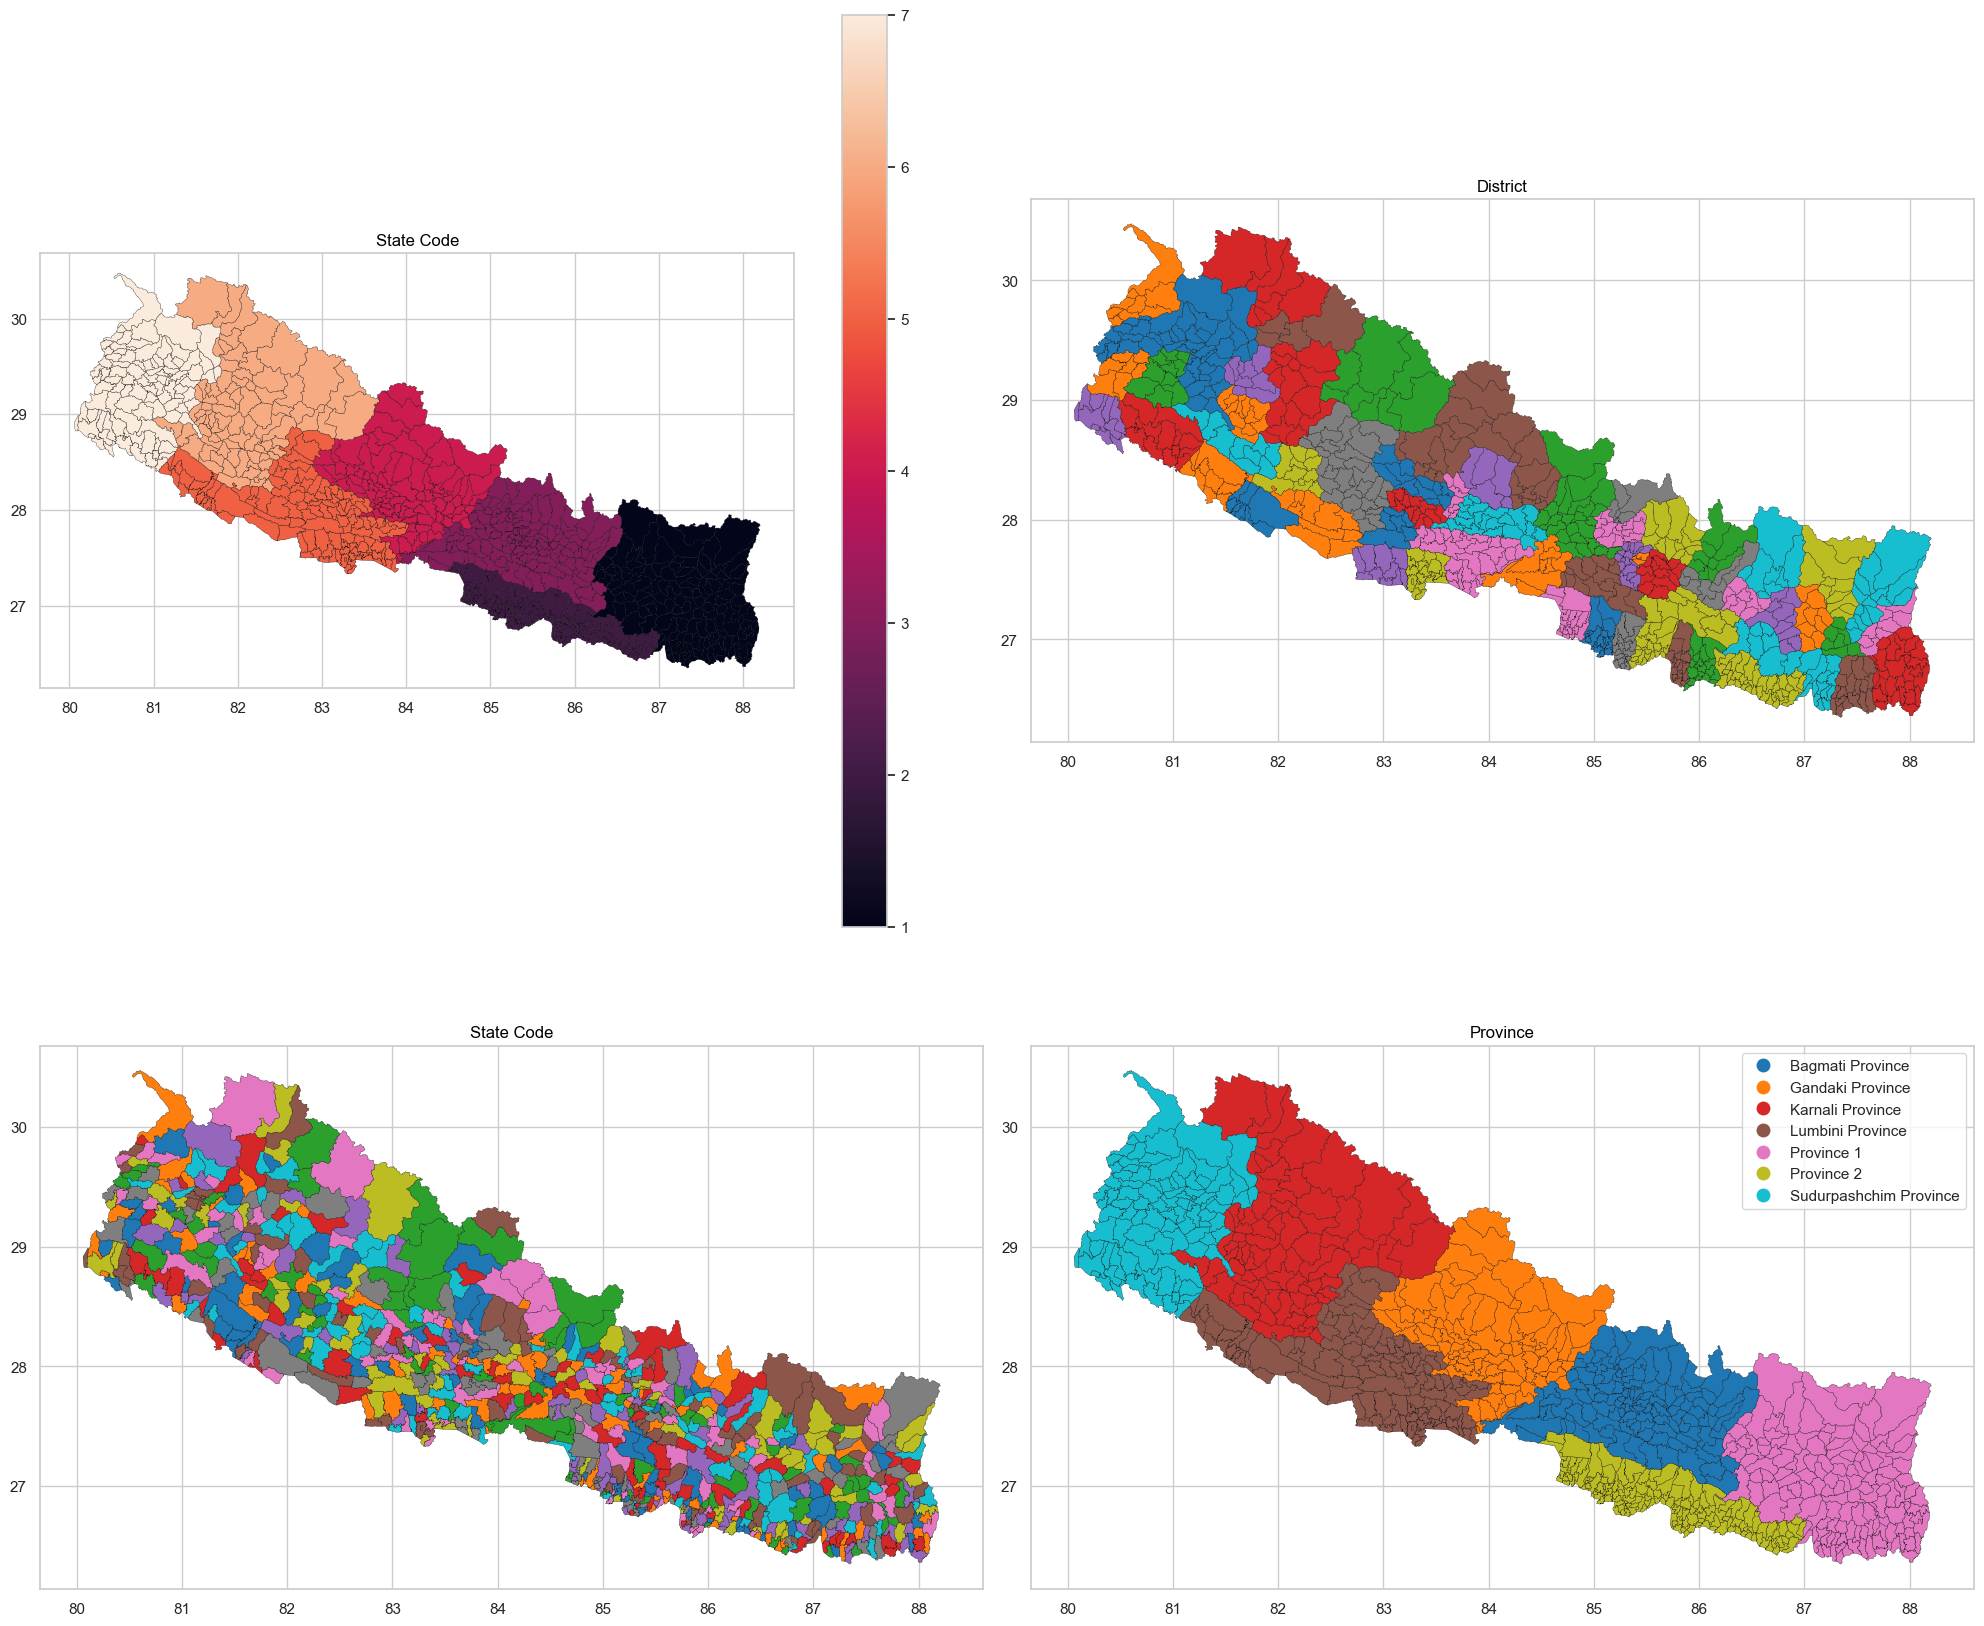

In [302]:
#Ploting the maps
figure, axe = plt.subplots(2,2, figsize=(20,18))
nepal_map.plot(column='STATE_CODE', ax=axe[0,0], legend=True, edgecolor='black', linewidth=0.2)
axe[0,0].set_title('State Code', color='black')
nepal_map.plot(column='DISTRICT', ax=axe[0,1], legend=False, edgecolor='black', linewidth=0.2)
axe[0,1].set_title('District', color='black')
nepal_map.plot(column='GaPa_NaPa', ax=axe[1,0], legend=False, edgecolor='black', linewidth=0.2)
axe[1,0].set_title('State Code', color='black')
nepal_map.plot(column='Province', ax=axe[1,1], legend=True, edgecolor='black', linewidth=0.2)
axe[1,1].set_title('Province', color='black')
plt.tight_layout()

# Nepal Admin Region

In [255]:
admin_regions = gpd.read_file('data/nepal_climate_data/nepal_admin_regions.gpkg')
print(admin_regions.head(7))

            name  climate_vulnerability_2020  climate_vulnerability_2050  \
0     Province 1                    0.449816                    0.656665   
1     Province 2                    0.680286                    0.939022   
2        Bagmati                    0.592798                    0.837280   
3        Gandaki                    0.539463                    0.650687   
4        Lumbini                    0.362407                    0.540340   
5        Karnali                    0.362398                    0.525380   
6  Sudurpashchim                    0.323233                    0.408471   

                                            geometry  
0  POLYGON ((87 26.5, 88 27, 87.8 28, 87 28.5, 86...  
1  POLYGON ((85 26.5, 87 26.5, 86.5 27.5, 85 27.2...  
2  POLYGON ((85 27.2, 86.5 27.5, 86.2 28.5, 85 28...  
3  POLYGON ((83.5 27.5, 85 27.2, 85 28.2, 84 29, ...  
4  POLYGON ((82 27, 83.5 27.5, 83.5 28, 82.5 28.2...  
5  POLYGON ((81 28, 82.5 28.2, 83.5 28, 82.5 29.5...  
6  POL

In [256]:
#Renaming the provinces
admin_regions['Province'] = admin_regions['name'].replace({'Bagmati':'Bagmati Province', "Gandaki":'Gandaki Province', 'Lumbini':'Lumbini Province', 'Karnali':'Karnali Province', 'Sudurpashchim':'Sudurpashchim Province'})
admin_regions['Province'].unique()

array(['Province 1', 'Province 2', 'Bagmati Province', 'Gandaki Province',
       'Lumbini Province', 'Karnali Province', 'Sudurpashchim Province'],
      dtype=object)

In [257]:
# display the columns
print(admin_regions.columns)
geom = admin_regions['geometry']
print(geom.type)

Index(['name', 'climate_vulnerability_2020', 'climate_vulnerability_2050',
       'geometry', 'Province'],
      dtype='object')
0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
5    Polygon
6    Polygon
dtype: object


In [258]:
# displaying the coordinate reference system
print("admin_regions = ", admin_regions.crs)
print("nepal_map = ", nepal_map.crs)
admin_regions.count()

admin_regions =  EPSG:4326
nepal_map =  EPSG:4326


name                          7
climate_vulnerability_2020    7
climate_vulnerability_2050    7
geometry                      7
Province                      7
dtype: int64

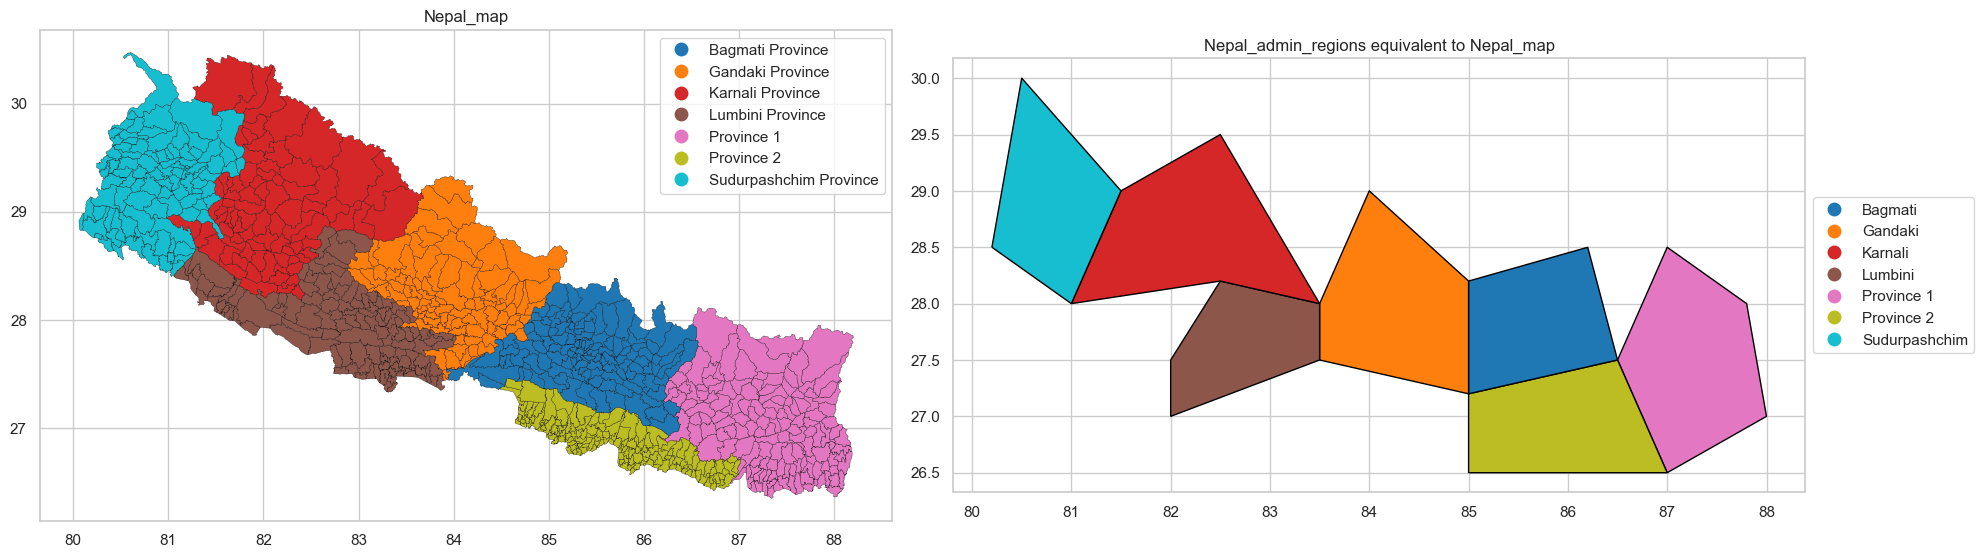

In [303]:
# plotting the map
fig, ax = plt.subplots(1,2, figsize = (20,15))
nepal_map.plot(column='Province', legend=True, ax=ax[0], edgecolor='black', linewidth=0.2)
ax[0].set_title("Nepal_map")
admin_regions.plot(column='name', legend=True, ax=ax[1], legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}, edgecolor='black')
plt.tight_layout()
ax[1].set_title("Nepal_admin_regions equivalent to Nepal_map")
plt.show()

In [260]:
# Merge the GeoDataFrame of nepal map with the vulnerability data in admin regions
temp = admin_regions.copy()
temp.drop(columns=['geometry'], inplace=True)

nepal_map = nepal_map.merge(temp, on='Province', how='left')
nepal_map.drop(columns=['name'], inplace=True)
nepal_map.head()

STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN    Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika  Province 1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika  Province 1   
2           1  TAPLEJUNG        Meringden  Gaunpalika  Province 1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika  Province 1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika  Province 1   

                                            geometry  \
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...   
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...   
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...   
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...   
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...   

   climate_vulnerability_2020  climate_vulnerability_2050  
0                    0.449816                    0.656665  
1                    0.449816                    0.656665  
2                    0.449816                    0.656665  
3                    0.449816                    0.656665  
4                    0.449816                    0.656665

In [261]:
# displaying the descritive of the data
print(admin_regions.describe())

       climate_vulnerability_2020  climate_vulnerability_2050
count                    7.000000                    7.000000
mean                     0.472914                    0.651121
std                      0.134887                    0.184633
min                      0.323233                    0.408471
25%                      0.362403                    0.532860
50%                      0.449816                    0.650687
75%                      0.566130                    0.746973
max                      0.680286                    0.939022


In [262]:
# Extracing relevant columns for bar plot
data = admin_regions.iloc[:, 0:3]
print(data)

            name  climate_vulnerability_2020  climate_vulnerability_2050
0     Province 1                    0.449816                    0.656665
1     Province 2                    0.680286                    0.939022
2        Bagmati                    0.592798                    0.837280
3        Gandaki                    0.539463                    0.650687
4        Lumbini                    0.362407                    0.540340
5        Karnali                    0.362398                    0.525380
6  Sudurpashchim                    0.323233                    0.408471


In [263]:
# melt the Dataframe
data_melted = pd.melt(data, id_vars=['name'], var_name='Year', value_name='Vulnerability')

#displaying the melted data
print(data_melted)


             name                        Year  Vulnerability
0      Province 1  climate_vulnerability_2020       0.449816
1      Province 2  climate_vulnerability_2020       0.680286
2         Bagmati  climate_vulnerability_2020       0.592798
3         Gandaki  climate_vulnerability_2020       0.539463
4         Lumbini  climate_vulnerability_2020       0.362407
5         Karnali  climate_vulnerability_2020       0.362398
6   Sudurpashchim  climate_vulnerability_2020       0.323233
7      Province 1  climate_vulnerability_2050       0.656665
8      Province 2  climate_vulnerability_2050       0.939022
9         Bagmati  climate_vulnerability_2050       0.837280
10        Gandaki  climate_vulnerability_2050       0.650687
11        Lumbini  climate_vulnerability_2050       0.540340
12        Karnali  climate_vulnerability_2050       0.525380
13  Sudurpashchim  climate_vulnerability_2050       0.408471


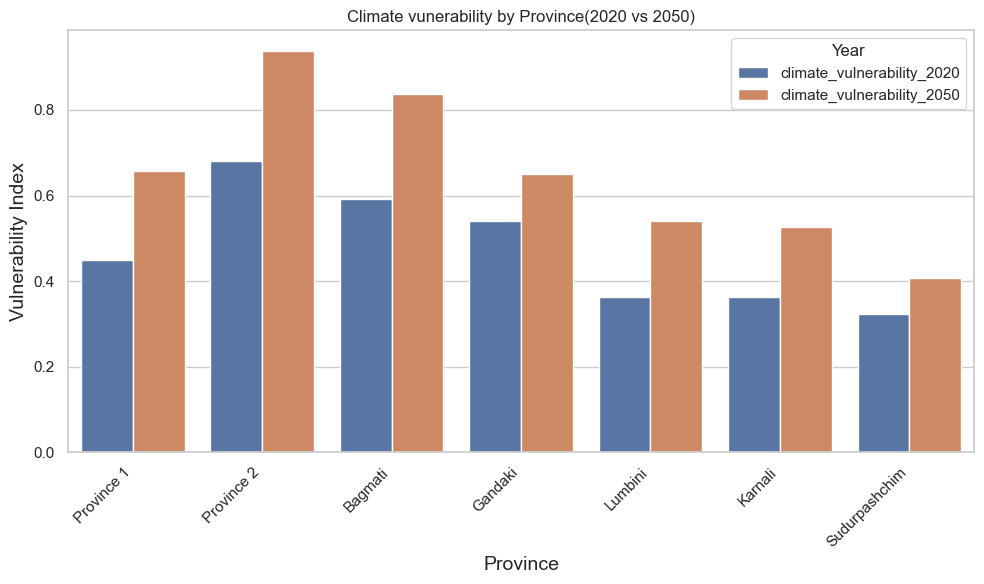

In [264]:
# plotting the bar chart
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x='name', y='Vulnerability', hue='Year', data=data_melted)

plt.title('Climate vunerability by Province(2020 vs 2050)')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Vulnerability Index', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

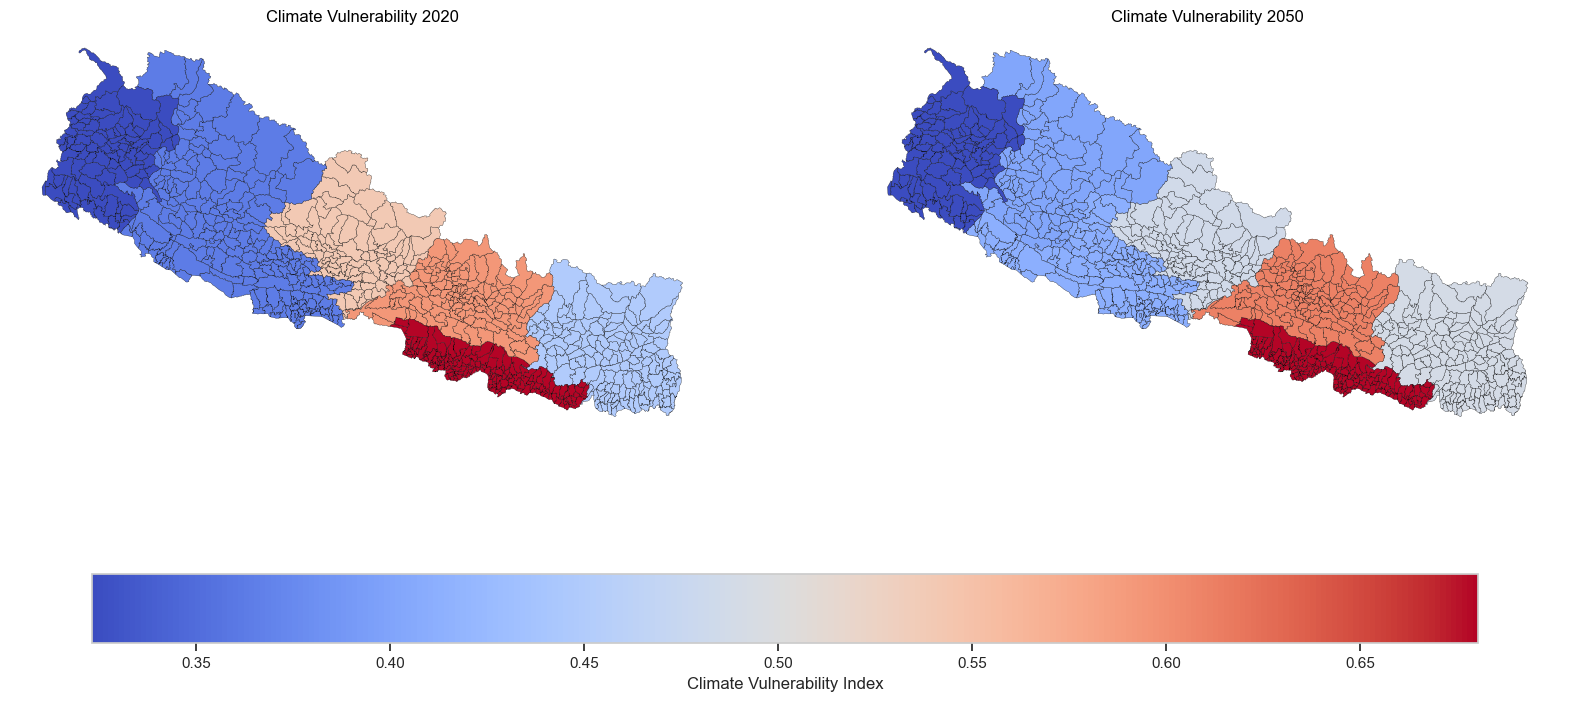

In [265]:
# plotting visulization of vunrability index in nepal map
fig, axe = plt.subplots(1, 2, figsize=(20, 18))  # Adjusted figure size

# Plot the maps
map1 = nepal_map.plot(column='climate_vulnerability_2020', ax=axe[0], edgecolor='black', cmap='coolwarm', linewidth=0.2)
axe[0].set_title('Climate Vulnerability 2020', color='black')
axe[0].set_axis_off() # Turn off the axis

map2 = nepal_map.plot(column='climate_vulnerability_2050', ax=axe[1], edgecolor='black', cmap='coolwarm',linewidth=0.2)
axe[1].set_title('Climate Vulnerability 2050', color='black')
axe[1].set_axis_off() # Turn off the axis

# Create a single colorbar
fig.colorbar(map1.get_children()[0], ax=axe.ravel().tolist(), orientation='horizontal', pad=0.1, fraction=0.05).set_label('Climate Vulnerability Index')

plt.show()

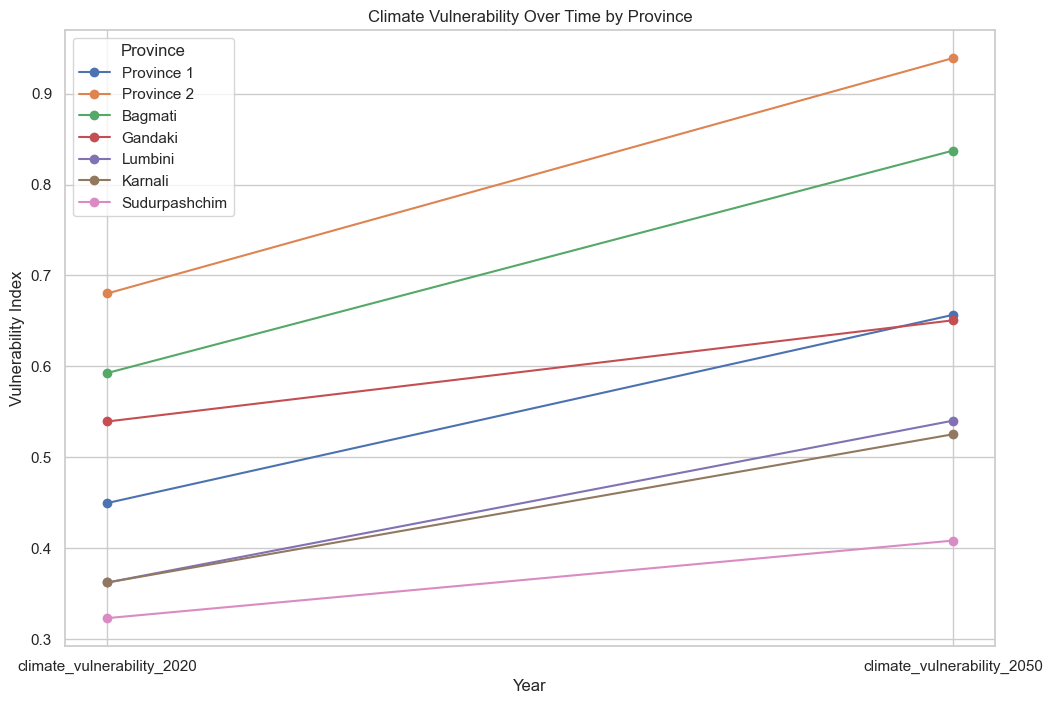

In [266]:
# plotting line plot
plt.figure(figsize=(12, 8))
for province in data_melted['name'].unique():
    province_data = data_melted[data_melted['name'] == province]
    plt.plot(province_data['Year'], province_data['Vulnerability'], marker='o', label=province)

plt.title('Climate Vulnerability Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Vulnerability Index')
plt.legend(title='Province')
plt.grid(True)
plt.show()

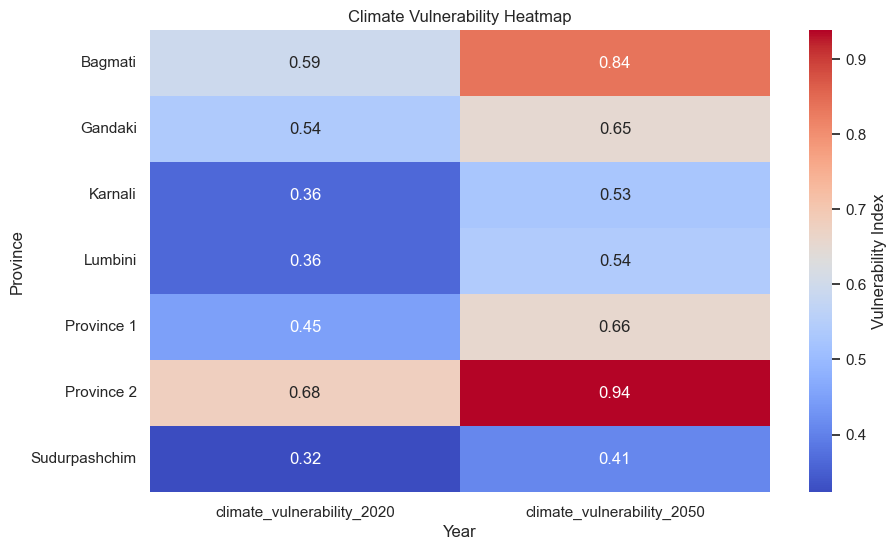

In [267]:
# Pivot the DataFrame for heatmap
pivot_data = data_melted.pivot(index="name", columns="Year", values="Vulnerability")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Vulnerability Index'})
plt.title('Climate Vulnerability Heatmap')
plt.xlabel('Year')
plt.ylabel('Province')
plt.show()

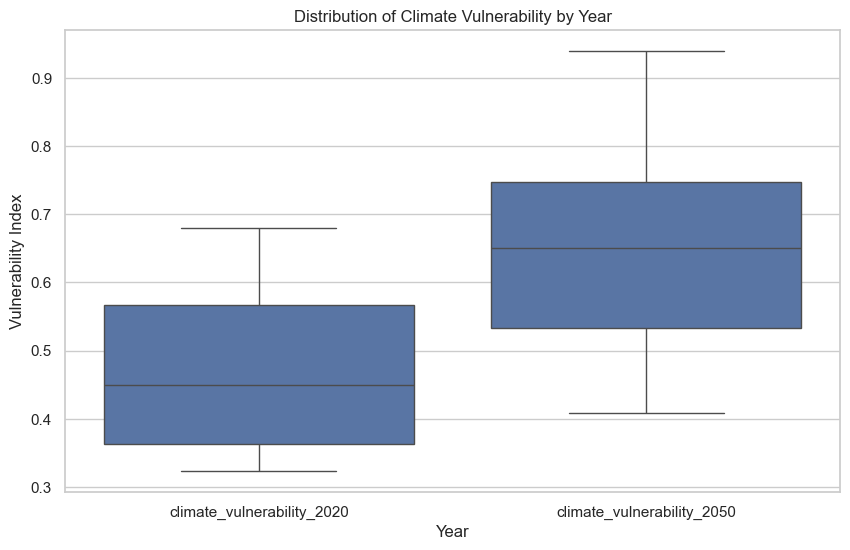

In [268]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Vulnerability', data=data_melted)
plt.title('Distribution of Climate Vulnerability by Year')
plt.xlabel('Year')
plt.ylabel('Vulnerability Index')
plt.show()

            name  climate_vulnerability_2020  climate_vulnerability_2050
0     Province 1                    0.449816                    0.656665
1     Province 2                    0.680286                    0.939022
2        Bagmati                    0.592798                    0.837280
3        Gandaki                    0.539463                    0.650687
4        Lumbini                    0.362407                    0.540340
5        Karnali                    0.362398                    0.525380
6  Sudurpashchim                    0.323233                    0.408471


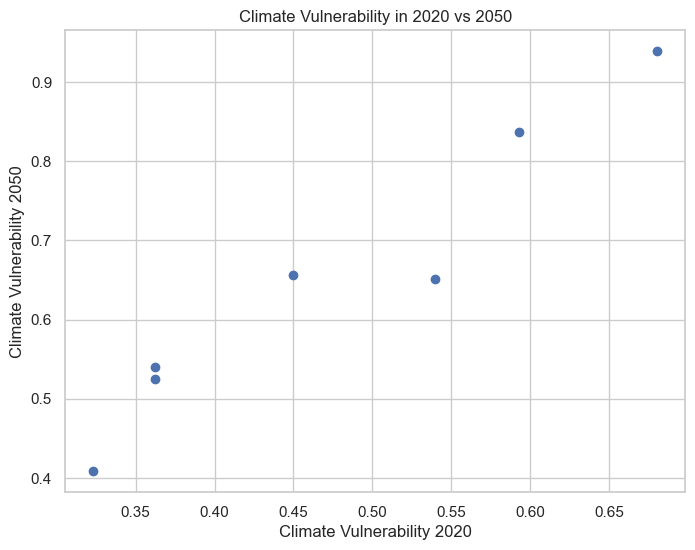

In [269]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['climate_vulnerability_2020'], data['climate_vulnerability_2050'])
plt.title('Climate Vulnerability in 2020 vs 2050')
plt.xlabel('Climate Vulnerability 2020')
plt.ylabel('Climate Vulnerability 2050')
plt.grid(True)
print(data)
plt.show()

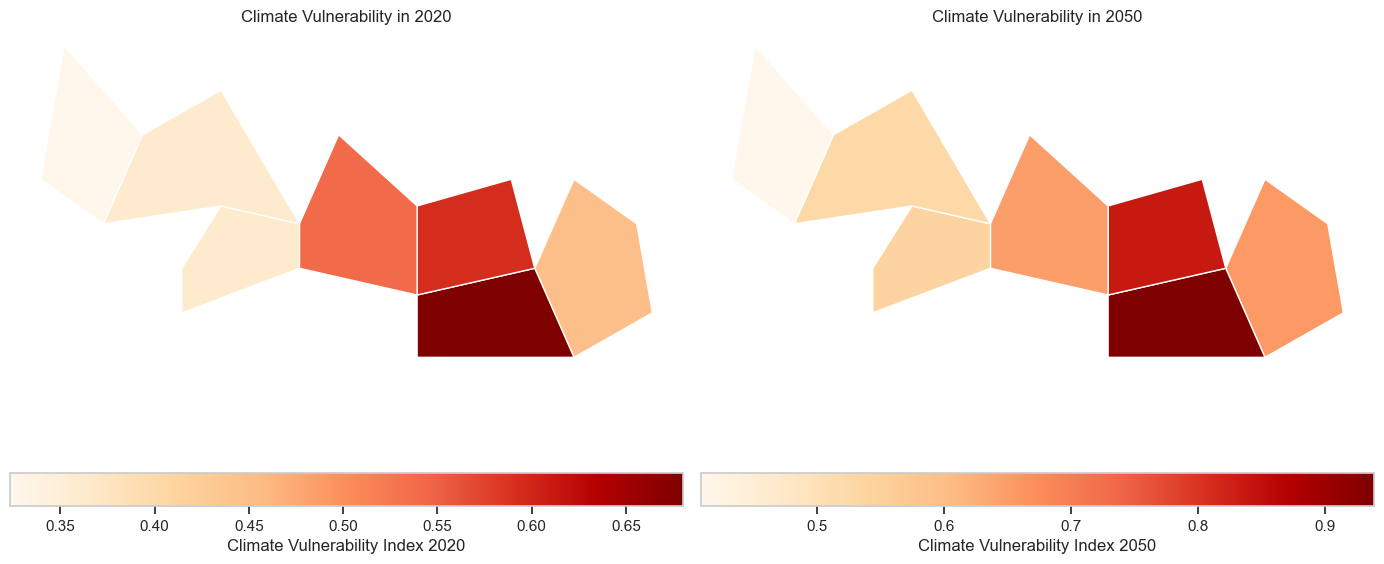

In [270]:
# Plot the map

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot for 2020
admin_regions.plot(column='climate_vulnerability_2020', cmap='OrRd', ax=ax[0], legend=True,
           legend_kwds={'label': "Climate Vulnerability Index 2020", 'orientation': "horizontal"})

ax[0].set_title('Climate Vulnerability in 2020')
ax[0].set_axis_off()  

# Plot for 2050
admin_regions.plot(column='climate_vulnerability_2050', cmap='OrRd', ax=ax[1], legend=True,
           legend_kwds={'label': "Climate Vulnerability Index 2050", 'orientation': "horizontal"})

ax[1].set_title('Climate Vulnerability in 2050')
ax[1].set_axis_off()  

# Show the plot
plt.tight_layout()
plt.show()

# Findings:
>The finding are provieded below:
>>### Climate Vunerability Index:
>>>The data provides the climate vunerability indices for 7 provinces of Nepal ranging from 0 to 1 for year 2020 and 2050, where higher values indicates the greater vulnerability to climate change impacts.
>>### Descriptive Statistics:
>>>##### Mean: 
>>>>* Year 2020: The average climate vulnerability index is approximately 0.473
>>>>* Year 2025: The average climate vulnerability index is approximately 0.651
>>>##### Standard Deviation:
>>>>* Year 2020: The standard deviation is about 0.135, indicating variability in vulnerability across provinces.
>>>>* Year 2025: The standard deviation is about 0.185, suggesting an increase in variablity in climate vulnerability from year 2020 to 2050.
>>>##### Minimum and Maximum:
>>>>* Year 2020: The minimum climate vulnerability index is 0.323 in Sudurpashchim province while the maximum vulnerability is 0.680 in Province 2.
>>>>* Year 2050: The minimum climate vulnerability index is 0.408 in Sudurpashchim Province and the maximum is 0.939 in Province 2, where it is seen that there has been a significant increase in climate vulnerability from year 2020 to 2050.
# Insights:
>1) Increasing Climate Vulnerability: There is a clear trend of increasing climate vulnerability from year 20202 to 2050 across all provinces. This suggests that the impacts of climate change has worsen over time.
>2) Province 2: This province has the highest climate vulnerabilty indices for year 2020 to 2050, indicating it is the most susceptible to climate change impacts.
>3) Sudurpashchim: Despite having the lowest current vulerabiltiy indices, this province susciptibility to climate vulnerability is relatively high.
>4) Variablity: The standard deviation for 2050 is higher than for 2020, indicating that the differences in climate vulnerability between provinces has increased over time.
# Implications:
>1) Policy Prioritization: Provinces with higher climate vulnerability indices like Province 2, should be prioritized for climate adaptation and mitigation efforts.
>2) Long-Term Planning: The projected increases in vulnerability highlight the need for long-term planning and investment in climate change adaptation strategies.
# Summary:
>The data and EDA analysis collectively reveal a concerning trend of increasing climate vulnerability across provinces in Nepal from 2020 to 2050. Province 2 stands out as particularly vulnerable since 2020 to 2050, while Sudupashchim is has also a significant rise in vulerability though this is the least vunerable to climate change in comparision to other provinces. The increasing variability indices in all provinces suggests that the impacts of climate change has been felt unevenly across provinces, necessitating targeted and tailored responses. Policymakers should prioritize provinces with higher climate vulnerability indices and invest in building resilience to migitate the adverse effects of climate chage in coming years.

# Nepal Glaciers

In [271]:
nepal_glaciers = gpd.read_file('data/nepal_climate_data/nepal_glaciers.gpkg')
print(nepal_glaciers.info())
print(nepal_glaciers.head(20))

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            20 non-null     object  
 1   retreat_2020  20 non-null     float64 
 2   retreat_2050  20 non-null     float64 
 3   increase_pct  20 non-null     float64 
 4   geometry      20 non-null     geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 928.0+ bytes
None
      id  retreat_2020  retreat_2050  increase_pct                   geometry
0   GL01     11.830574     18.308859     54.758846  POINT (83.07123 29.91778)
1   GL02     10.515828     18.451705     75.466020  POINT (87.79586 29.20924)
2   GL03     13.881700     22.644677     63.126114  POINT (86.00235 29.43822)
3   GL04     14.675666     22.894538     56.003401    POINT (84.909 29.54954)
4   GL05     18.200654     25.343086     39.242723   POINT (81.27935 29.6841)
5   GL06     24.543769     41.419241   

In [272]:
# display the columns
print(nepal_glaciers.columns)
geom = nepal_glaciers['geometry']
print(geom.type)

Index(['id', 'retreat_2020', 'retreat_2050', 'increase_pct', 'geometry'], dtype='object')
0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
18    Point
19    Point
dtype: object


In [273]:
# displaying the coordinate reference system
print("nepal_glaciers = ", nepal_glaciers.crs)
print("nepal_map = ", nepal_map.crs)
nepal_glaciers.count()

nepal_glaciers =  EPSG:4326
nepal_map =  EPSG:4326


id              20
retreat_2020    20
retreat_2050    20
increase_pct    20
geometry        20
dtype: int64

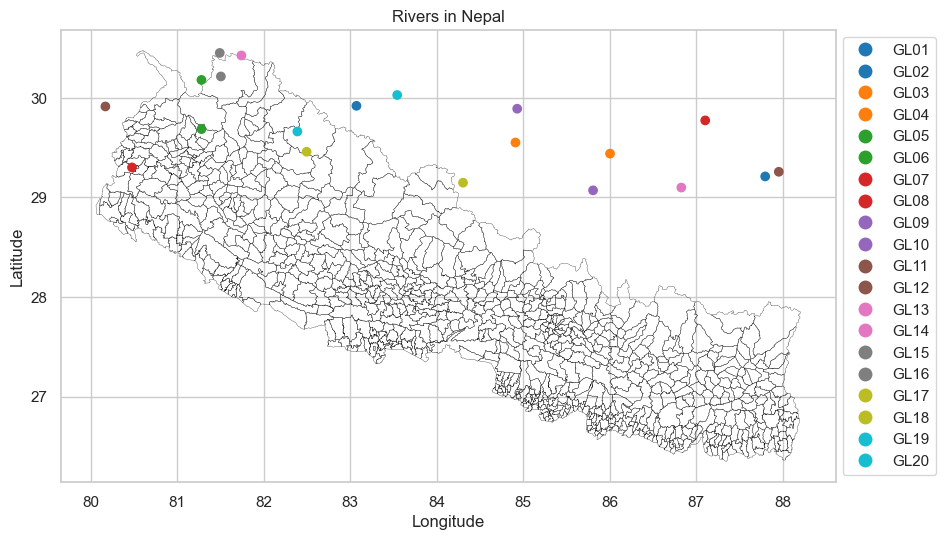

In [274]:
# plotting the map
fig, ax = plt.subplots(1,1, figsize = (10,15))
nepal_map.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.2)
nepal_glaciers.plot(column='id', legend=True, ax=ax, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)})
ax.set_title('Rivers in Nepal')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

The glaciers doesnt fit in the nepal map correctly so try on admin region if it fits correctly

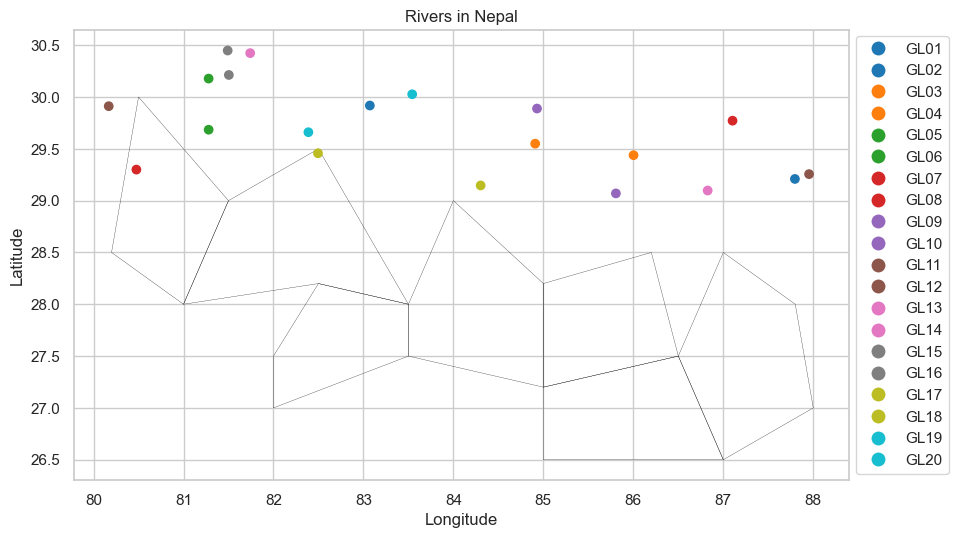

In [275]:
# plotting the map
fig, ax = plt.subplots(1,1, figsize = (10,15))
admin_regions.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.2)
nepal_glaciers.plot(column='id', legend=True, ax=ax, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)})
ax.set_title('Rivers in Nepal')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

The case is similar so lets assume the glacier points are randomized and are not actual point in the map

In [276]:
# displaying the descritive of the data
print(nepal_glaciers.describe())

       retreat_2020  retreat_2050  increase_pct
count     20.000000     20.000000     20.000000
mean      16.181887     25.311193     56.945175
std        4.907680      8.045469     15.263747
min       10.082832     15.618937     33.702233
25%       11.704777     19.567904     42.659535
50%       15.026326     22.685817     56.569103
75%       20.844409     30.942850     70.275655
max       24.543769     42.099536     79.344347


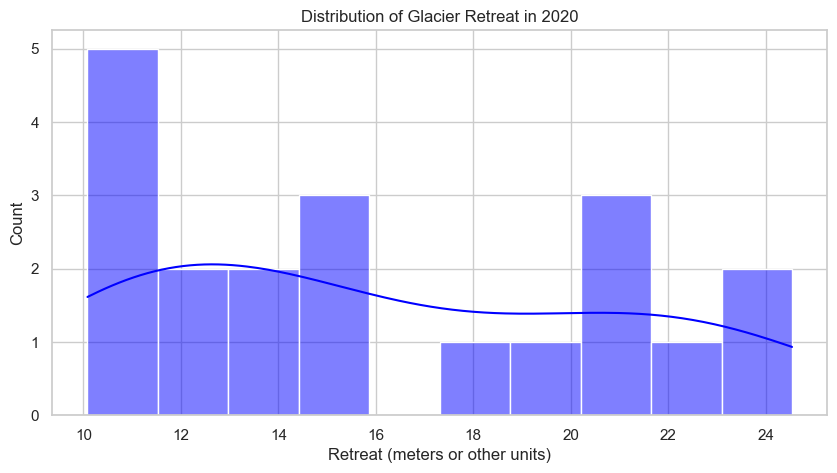

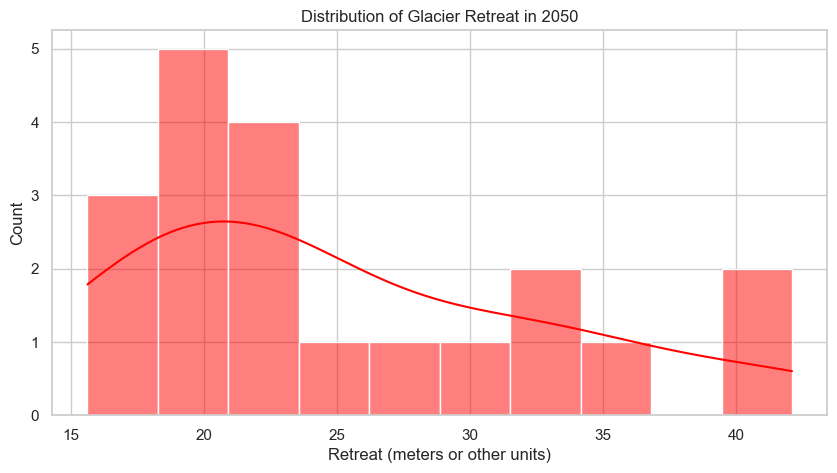

In [277]:
# Histograms for Glacier Retreat in 2020 and 2050 
plt.figure(figsize=(10, 5))
sns.histplot(nepal_glaciers['retreat_2020'], bins=10, kde=True, color='blue')
plt.title('Distribution of Glacier Retreat in 2020')
plt.xlabel('Retreat (meters or other units)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(nepal_glaciers['retreat_2050'], bins=10, kde=True, color='red')
plt.title('Distribution of Glacier Retreat in 2050')
plt.xlabel('Retreat (meters or other units)')
plt.ylabel('Count')
plt.show()

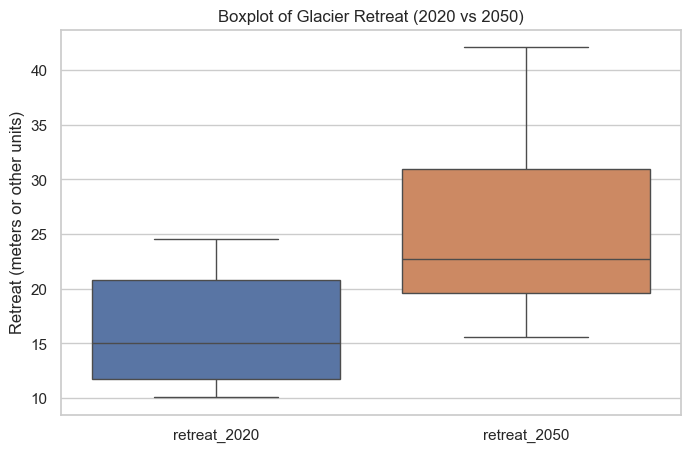

In [278]:
# Boxplot of Glacier Retreat
plt.figure(figsize=(8, 5))
sns.boxplot(data=nepal_glaciers[['retreat_2020', 'retreat_2050']])
plt.title('Boxplot of Glacier Retreat (2020 vs 2050)')
plt.ylabel('Retreat (meters or other units)')
plt.show()

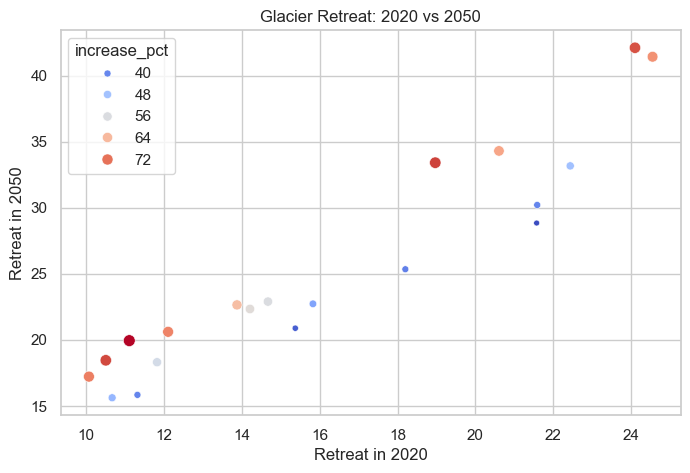

In [279]:
# Scatter Plot of Glacier Retreat in 2020 vs 2050 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=nepal_glaciers['retreat_2020'], y=df['retreat_2050'], hue=df['increase_pct'], palette='coolwarm', size=df['increase_pct'])
plt.xlabel('Retreat in 2020')
plt.ylabel('Retreat in 2050')
plt.title('Glacier Retreat: 2020 vs 2050')
plt.show()

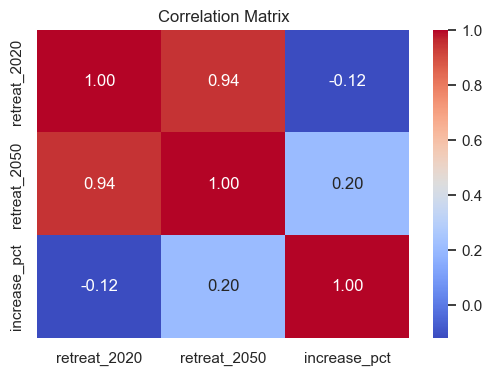

In [280]:
# Correlation Heatmap 
plt.figure(figsize=(6, 4))
sns.heatmap(nepal_glaciers[['retreat_2020', 'retreat_2050', 'increase_pct']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

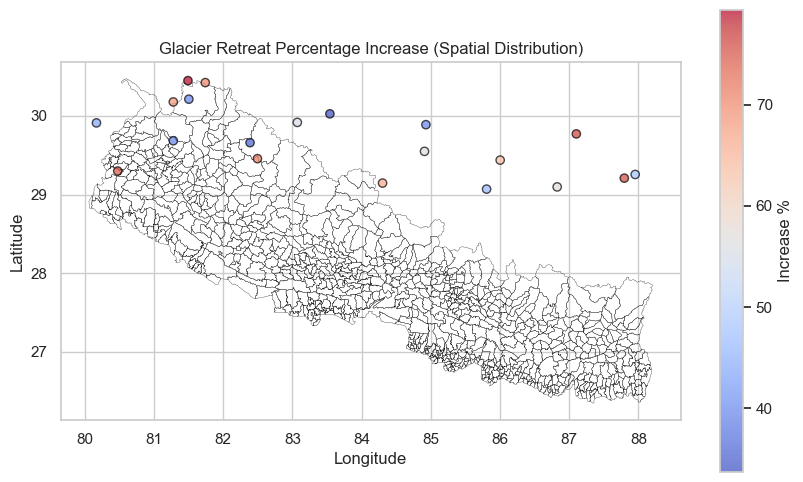

In [281]:
# Geographic Plot of Glacier Locations
fig, ax = plt.subplots(figsize=(10, 6))
nepal_map.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.2)
plt.scatter(nepal_glaciers.geometry.x, nepal_glaciers.geometry.y, c=nepal_glaciers['increase_pct'], cmap='coolwarm', edgecolor='black', alpha=0.7)
plt.colorbar(label='Increase %')
plt.title('Glacier Retreat Percentage Increase (Spatial Distribution)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

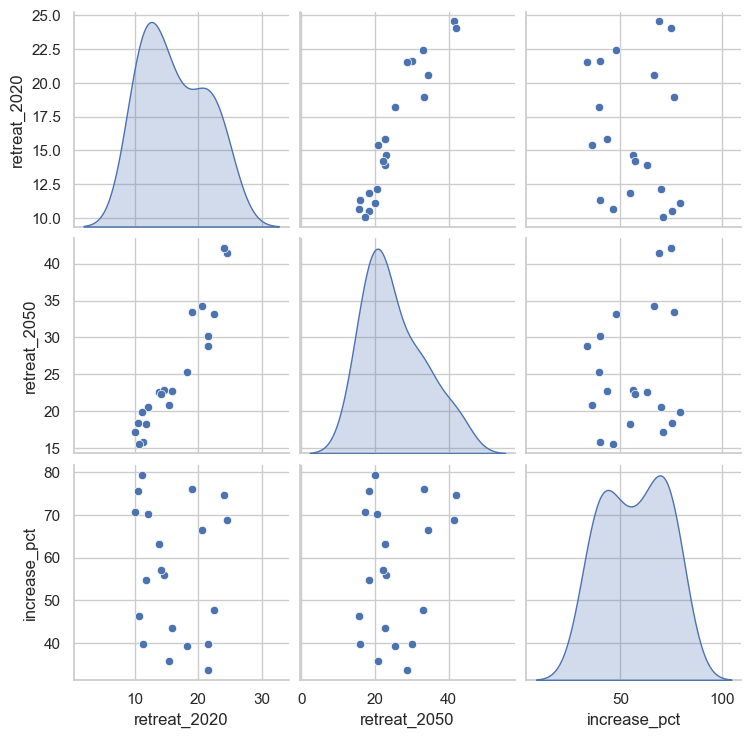

In [282]:
# Pairplot for Detailed Relationship Analysis 
sns.pairplot(nepal_glaciers[['retreat_2020', 'retreat_2050', 'increase_pct']], diag_kind='kde')
plt.show()

# Findings & Insights:

>##### 1) Increasing Glacier Retreat Over Time
>>* The histograms show that glacier retreat is increasing significantly from 2020 to 2050.
>>* In 2050, the distribution of retreat values shifts higher, indicating more severe glacier loss.

>##### 2) Greater Variability in Future Glacier Retreat
>>* The boxplot highlights that the spread of glacier retreat values in 2050 is wider compared to 2020.
>>* This suggests that while some glaciers may retreat gradually, others may experience extreme melting.

>##### 3) Strong Positive Correlation Between Glacier Retreat in 2020 and 2050
>>* The scatter plot shows a clear upward trend, meaning glaciers that retreated more in 2020 have retreated even more in 2050.
>>* The correlation heatmap confirms a strong relationship, suggesting that current melting trends will continue and worsen.

>##### 4) Geographic Variability in Glacier Retreat
>>* The spatial plot highlights specific regions with higher glacier retreat percentages, indicating that some areas are more vulnerable than others.
>>* These areas may be experiencing higher temperatures or changes in precipitation patterns.

# Implications

>##### 1) Water Scarcity Risks 
>>* Many rivers depend on glacier melt for freshwater. If glaciers continue retreating at this rate, water shortages could occur, especially in downstream regions.

>##### 2) Increased Flood Risks & Glacial Lake Outbursts 
>>* Faster glacier retreat can form unstable glacial lakes, increasing the risk of flooding and natural disasters.

>##### 3) Impacts on Biodiversity & Ecosystems 
>>* Wildlife and plant species dependent on glacial water may face habitat loss.

>##### 4) Climate Change Acceleration 
>>* The loss of glaciers reduces Earth's reflectivity (albedo effect), causing further warming.

>##### 5) Need for Policy Action & Climate Mitigation 
>>* Governments and researchers must implement conservation strategies and monitor glaciers continuously.

# Summary
> The analysis highlights a significant and accelerating trend of glacier retreat from 2020 to 2050.The data suggests that glacier loss will impact water availability, increase flood risks, and contribute to climate change. Spatial trends indicate that some regions will be more affected than others, necessitating targeted intervention. Without mitigation efforts, glacial loss will continue to accelerate, threatening ecosystems and human settlements.

# Nepal Rivers

In [283]:
nepal_rivers = gpd.read_file('data/nepal_climate_data/nepal_rivers.gpkg')
print(nepal_rivers.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                4 non-null      object  
 1   flow_2020           4 non-null      int64   
 2   flow_2050           4 non-null      int64   
 3   flow_reduction_pct  4 non-null      float64 
 4   geometry            4 non-null      geometry
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 288.0+ bytes
None


In [284]:
print(nepal_rivers.head(20))


       name  flow_2020  flow_2050  flow_reduction_pct  \
0     Koshi       2200       2000            9.090909   
1   Gandaki       1800       1650            8.333333   
2   Karnali       1600       1400           12.500000   
3  Mahakali       1200       1050           12.500000   

                                            geometry  
0  POLYGON ((86 26.5, 86.1 26.5, 87 28, 86.9 28, ...  
1  POLYGON ((84 26.5, 84.1 26.5, 85 28.5, 84.9 28...  
2  POLYGON ((81 26.5, 81.1 26.5, 82 29, 81.9 29, ...  
3  POLYGON ((80 26.5, 80.1 26.5, 80.5 29, 80.4 29...  


In [285]:
geom = nepal_rivers['geometry']
print(geom.type)


0    Polygon
1    Polygon
2    Polygon
3    Polygon
dtype: object


In [286]:
# displaying the coordinate reference system
print("nepal_rivers = ", nepal_rivers.crs)
print("nepal_map = ", nepal_map.crs)
# Summary Statistics
print("Summary Statistics:\n", nepal_rivers.describe())

nepal_rivers =  EPSG:4326
nepal_map =  EPSG:4326
Summary Statistics:
        flow_2020    flow_2050  flow_reduction_pct
count     4.0000     4.000000            4.000000
mean   1700.0000  1525.000000           10.606061
std     416.3332   401.040314            2.208694
min    1200.0000  1050.000000            8.333333
25%    1500.0000  1312.500000            8.901515
50%    1700.0000  1525.000000           10.795455
75%    1900.0000  1737.500000           12.500000
max    2200.0000  2000.000000           12.500000


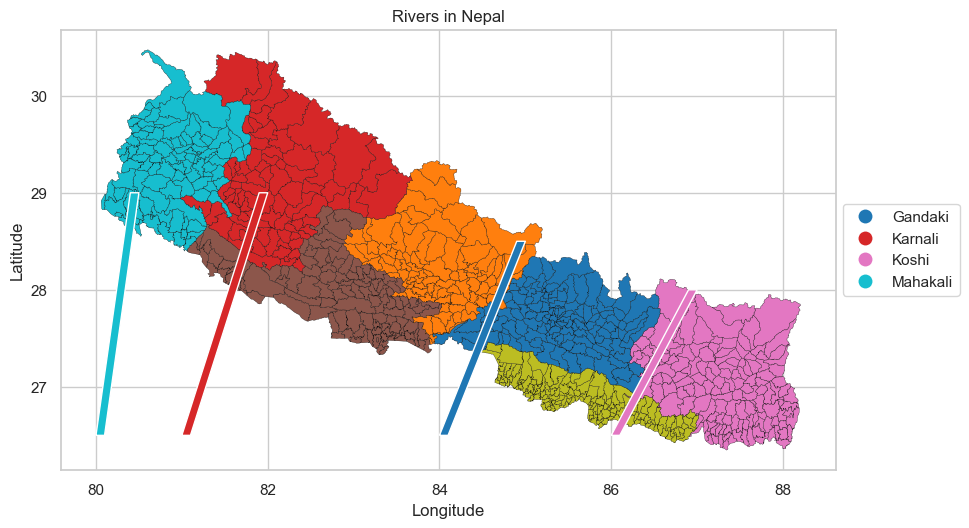

In [287]:
# plotting the map
fig, ax = plt.subplots(1,1, figsize = (10,15))
nepal_map.plot(column='Province', ax=ax, edgecolor="black", linewidth=0.2)
nepal_rivers.plot(column='name', legend=True, ax=ax, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)})
ax.set_title('Rivers in Nepal')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

The rivers too are randomized polygons so it doesnt matches with the map as it should.

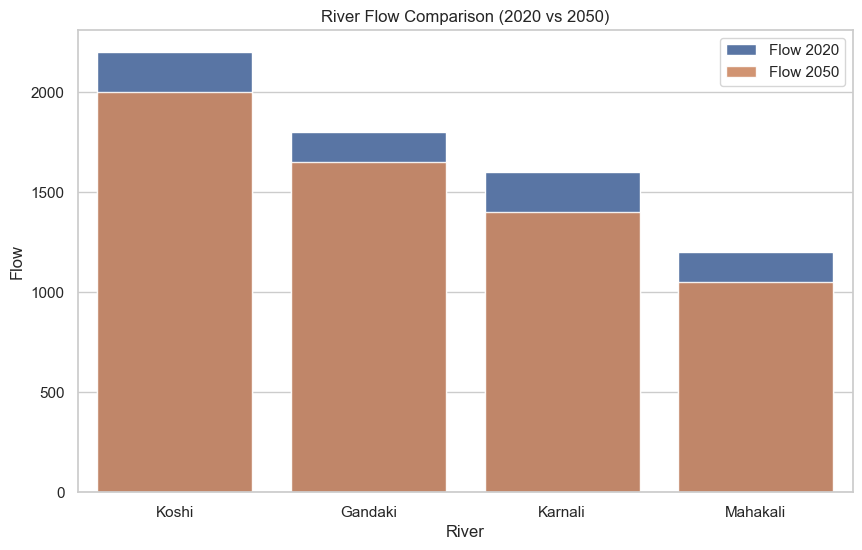

In [288]:
# Plot flow data
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='flow_2020', data=nepal_rivers, label='Flow 2020')
sns.barplot(x='name', y='flow_2050', data=nepal_rivers, label='Flow 2050', alpha=0.9)
plt.xlabel('River')
plt.ylabel('Flow')
plt.title('River Flow Comparison (2020 vs 2050)')
plt.legend()
plt.show()

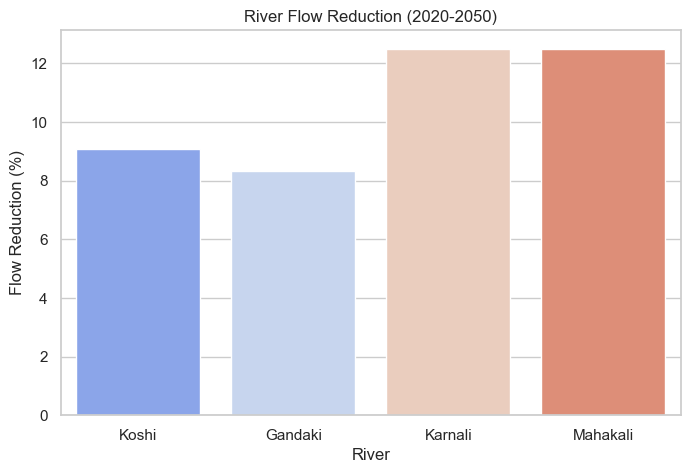

In [289]:
# Visualization: Flow Reduction over Time
plt.figure(figsize=(8, 5))
sns.barplot(x='name', y='flow_reduction_pct', data=nepal_rivers, hue='name', palette='coolwarm')
plt.title('River Flow Reduction (2020-2050)')
plt.xlabel('River')
plt.ylabel('Flow Reduction (%)')
plt.show()

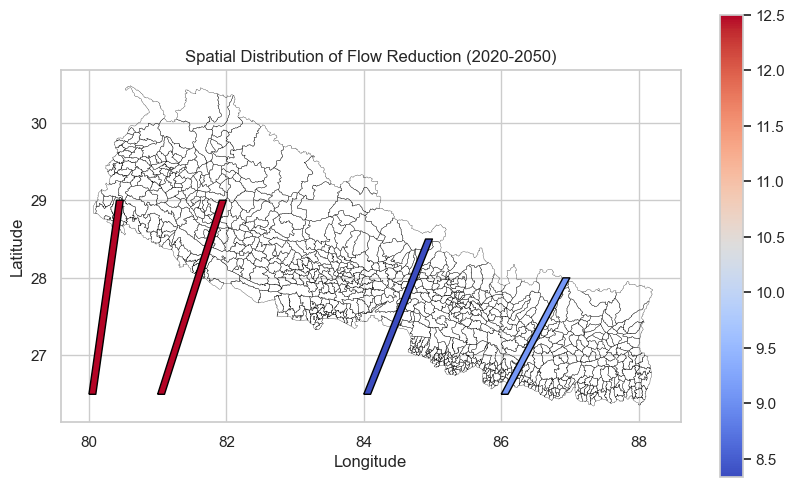

In [290]:
# Mapping the Flow Reduction
fig, ax = plt.subplots(1,1, figsize = (10,6))
nepal_map.plot(column='Province', ax=ax, edgecolor="black", linewidth=0.2, facecolor="none")
nepal_rivers.plot(column='flow_reduction_pct',ax=ax, cmap='coolwarm', legend=True, edgecolor='black')
plt.title('Spatial Distribution of Flow Reduction (2020-2050)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

# Findings

>### Flow Reduction:
>>- All rivers show a reduction in flow from 2020 to 2050.
>>- The rivers with the highest reduction percentages are Karnali and Mahakali (12.5%).
>### Flow Values:
>>- Koshi has the highest flow in both 2020 and 2050.
>>- Mahakali has the lowest flow in both years.
>### Geographical Distribution:
>>- The rivers are located in different regions, with Koshi being the easternmost and Mahakali being the westernmost.

# Insights

>- The flow reduction could be due to various factors such as climate change, water usage, or changes in land use.
>- The geographical distribution of the rivers suggests that the reduction might be influenced by regional differences in climate and human activities.

# Implications

>- Water Management: The reduction in flow could impact water availability for agriculture, drinking water, and industrial use.
>- Environmental Impact: Lower flows might affect aquatic ecosystems and biodiversity.
>- Policy and Planning: This data could inform water management policies and planning for future infrastructure projects.

# Summary
>- The EDA reveals that all rivers in the dataset experience a reduction in flow from 2020 to 2050, with Karnali and Mahakali showing the highest reduction percentages. The geographical distribution of the rivers suggests regional differences in flow reduction. These findings have significant implications for water management, environmental impact, and policy planning. Further investigation into the causes of flow reduction is recommended.

# TIF files

Importing Libraries

In [291]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats

In [292]:
# Load GeoTIFF files
with rasterio.open("data/nepal_climate_data/nepal_precipitation_2020.tif") as src:
    precipitation_2020 = src.read(1)
    affine_2020 = src.transform  # Extract affine transform
    meta = src.meta

with rasterio.open("data/nepal_climate_data/nepal_precipitation_2050.tif") as src:
    precipitation_2050 = src.read(1)
    affine_2050 = src.transform  # Extract affine transform

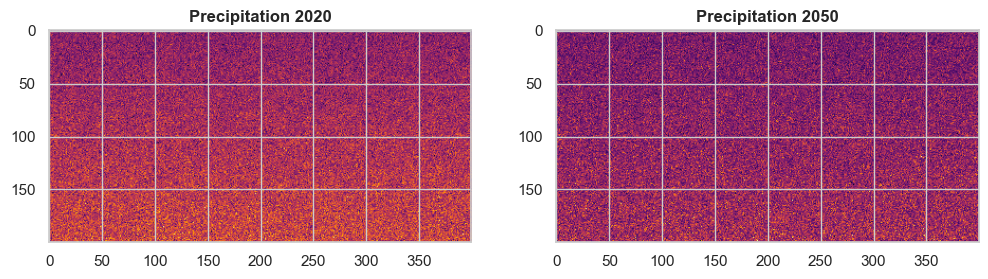

In [309]:
# Visualize precipitation data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
show(precipitation_2020, ax=ax[0], title="Precipitation 2020", cmap="inferno")
show(precipitation_2050, ax=ax[1], title="Precipitation 2050", cmap="inferno")
plt.show()

In [294]:
# Zonal statistics
zs_2020 = zonal_stats(nepal_map, precipitation_2020, affine=affine_2020,  # Pass the affine transform
    stats=["mean", "min", "max"])
zs_2050 = zonal_stats(nepal_map, precipitation_2050, affine=affine_2050,  # Pass the affine transform
    stats=["mean", "min", "max"])

In [295]:
# Add zonal stats to the shapefile
nepal_map["mean_precip_2020"] = [x["mean"] for x in zs_2020]
nepal_map["mean_precip_2050"] = [x["mean"] for x in zs_2050]

nepal_map["max_precip_2020"] = [x["max"] for x in zs_2020]
nepal_map["max_precip_2050"] = [x["max"] for x in zs_2050]

nepal_map["min_precip_2020"] = [x["min"] for x in zs_2020]
nepal_map["min_precip_2050"] = [x["min"] for x in zs_2050]

nepal_map.columns

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry', 'climate_vulnerability_2020', 'climate_vulnerability_2050',
       'mean_precip_2020', 'mean_precip_2050', 'max_precip_2020',
       'max_precip_2050', 'min_precip_2020', 'min_precip_2050'],
      dtype='object')

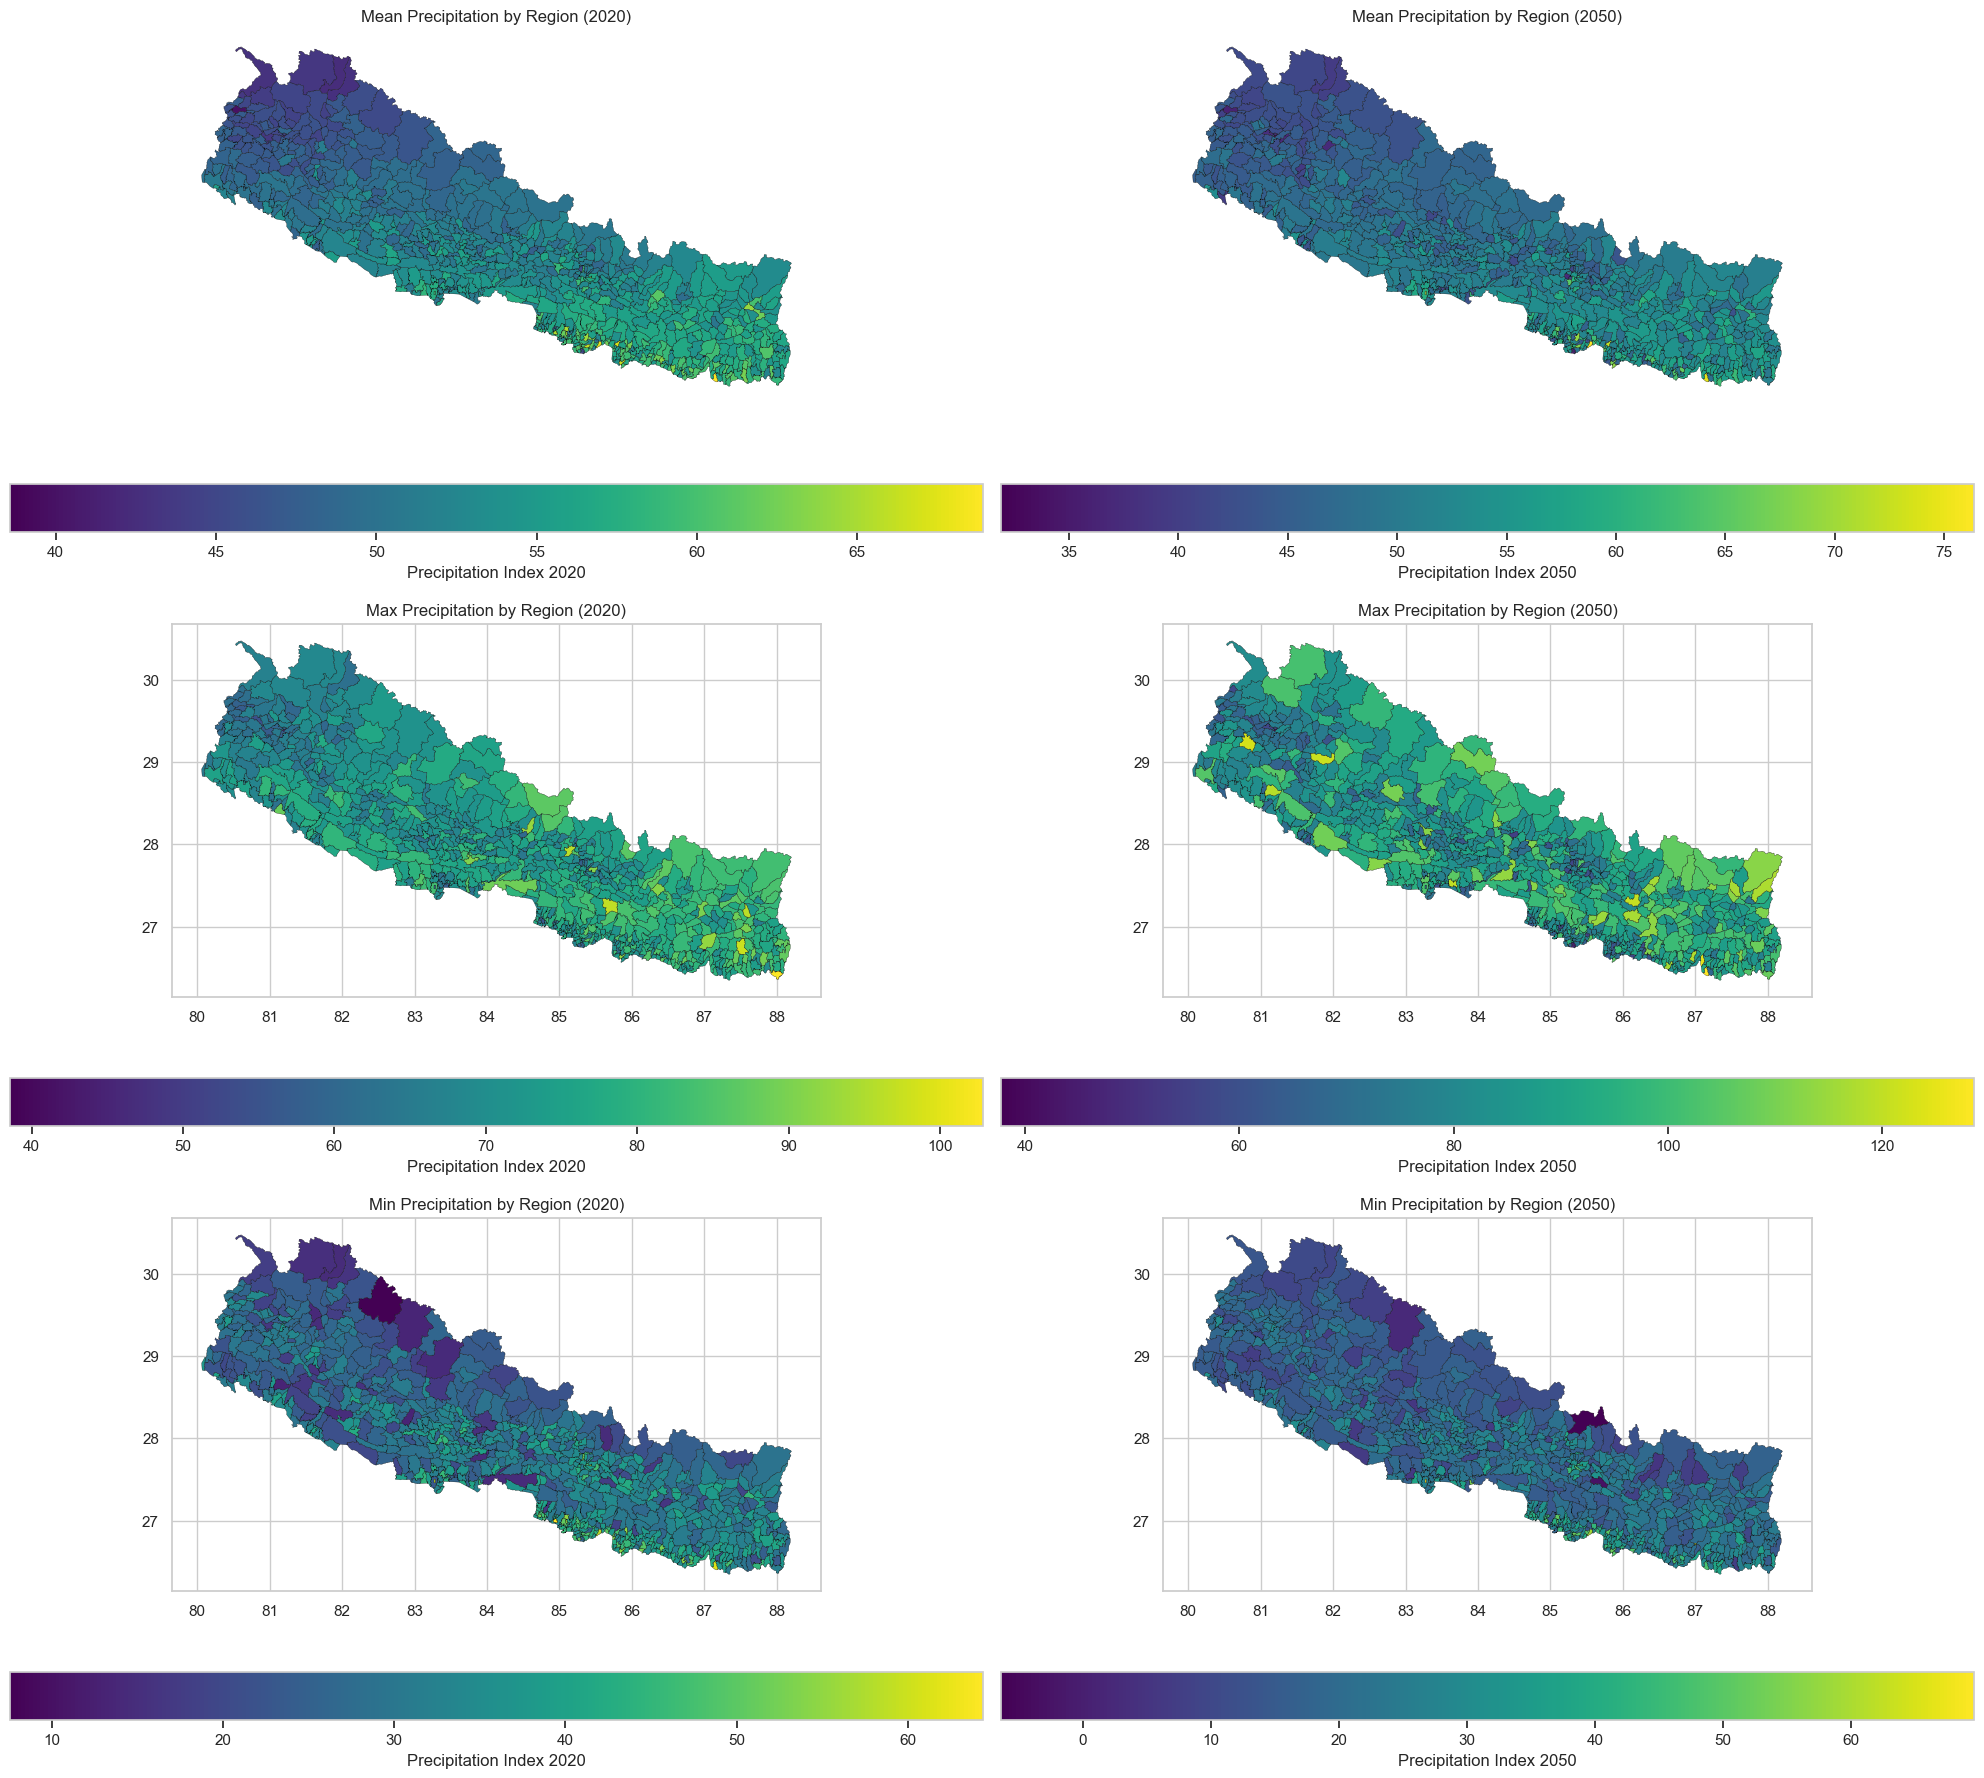

In [314]:
# Visualize regional trends
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
nepal_map.plot(column="mean_precip_2020", ax=ax[0,0], legend=True, cmap="viridis", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[0,0].set_title("Mean Precipitation by Region (2020)")
ax[0,0].set_axis_off()

nepal_map.plot(column="mean_precip_2050", ax=ax[0,1], legend=True, cmap="viridis", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[0,1].set_title("Mean Precipitation by Region (2050)")
ax[0,1].set_axis_off()


nepal_map.plot(column="max_precip_2020", ax=ax[1,0], legend=True, cmap="viridis", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[1,0].set_title("Max Precipitation by Region (2020)")

nepal_map.plot(column="max_precip_2050", ax=ax[1,1], legend=True, cmap="viridis", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[1,1].set_title("Max Precipitation by Region (2050)")

nepal_map.plot(column="min_precip_2020", ax=ax[2,0], legend=True, cmap="viridis", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[2,0].set_title("Min Precipitation by Region (2020)")
nepal_map.plot(column="min_precip_2050", ax=ax[2,1], legend=True, cmap="viridis", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[2,1].set_title("Min Precipitation by Region (2050)")

plt.tight_layout()
plt.show()

# Findings:
>- Mean Precipitaion: Analysis of mean precipitation data reveals that the eastern region of Nepal historically experiences higher precipitation levels compared to the western region. However, a significant decline in precipitation is projected in the eastern part of the country from 2020 to 2050.
>- Max Precipitation: By 2050, maximum precipitation levels have increased across Nepal, particularly in the Himalayan and Terai regions. This indicates a likelihood of more intense rainfall events and extreme weather occurrences nationwide.
>- Min Precipitation: Regions with historically low minimum precipitation in 2020 have experienced an increase in minimum precipitation by 2050. Conversely, areas that previously recorded higher-than-average minimum precipitation bobserved a decrease in precipitation. This suggests a shift in precipitation distribution patterns over time.

# Insights:
>- Regional Variability in Precipitation: The eastern part of Nepal historically receives higher precipitation compared to the western region. However, this trend is shifting, with a significant drop in mean precipitation in the eastern part from 2020 to 2050.
>- Increased Extreme Precipitation Events: Maximum precipitation is projected to increase across Nepal by 2050, particularly in the Himalayas and Terai regions. This suggests a rise in extreme weather events, such as heavy rainfall and flooding.
>- Shifts in Minimum Precipitation: Areas that previously had low minimum precipitation in 2020 are likely to experience an increase by 2050, while regions with historically higher minimum precipitation may see a decrease. This indicates a potential redistribution of rainfall patterns.

# Implications:
>- Water Resource Management: The decline in mean precipitation in the eastern region could lead to water scarcity, affecting agriculture, hydropower, and daily water supply. Policymakers and planners need to focus on sustainable water management strategies.
>- Disaster Preparedness: The increase in maximum precipitation, especially in the Himalayas and Terai, raises the risk of flooding, landslides, and other natural disasters. Enhanced disaster preparedness and infrastructure resilience will be critical.
>- Agricultural Adaptation: Changes in minimum precipitation patterns may impact crop yields and farming practices. Farmers may need to adapt by shifting to drought-resistant crops or altering planting schedules.
>- Ecological Impact: Shifts in precipitation patterns could affect ecosystems, particularly in regions with decreasing rainfall. Biodiversity conservation efforts may need to account for these changes.

# Summary:

The precipitation trends in Nepal from 2020 to 2050 indicate significant changes, with a notable drop in mean precipitation in the eastern region and an increase in maximum precipitation across the country, particularly in the Himalayas and Terai. Minimum precipitation is also expected to shift, with increases in historically dry areas and decreases in regions with higher baseline precipitation. These changes have far-reaching implications for water resource management, disaster preparedness, agriculture, and ecological conservation. Proactive measures will be essential to mitigate the impacts and adapt to the evolving climate scenario.

In [297]:
# Load GeoTIFF files
with rasterio.open("data/nepal_climate_data/nepal_temperature_2020.tif") as src:
    temperature_2020 = src.read(1)
    affine2_2020 = src.transform  # Extract affine transform
    meta = src.meta

with rasterio.open("data/nepal_climate_data/nepal_temperature_2050.tif") as src:
    temperature_2050 = src.read(1)
    affine2_2050 = src.transform  # Extract affine transform

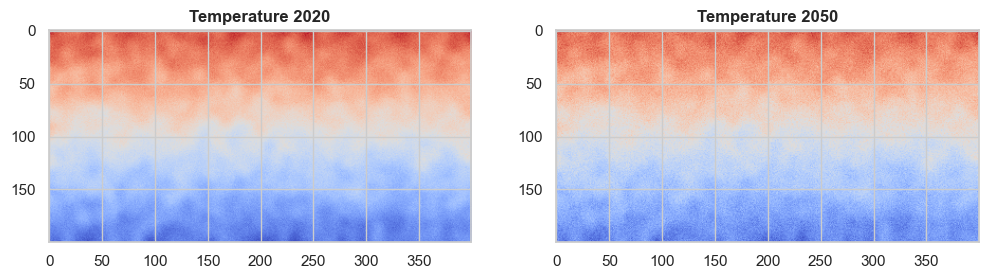

In [305]:
# Visualize precipitation data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
show(temperature_2020, ax=ax[0], title="Temperature 2020", cmap="coolwarm")
show(temperature_2050, ax=ax[1], title="Temperature 2050", cmap="coolwarm")
plt.show()

In [306]:
# Zonal statistics
zs2_2020 = zonal_stats(nepal_map, temperature_2020, affine=affine2_2020,  # Pass the affine transform
    stats=["mean", "min", "max"])
zs2_2050 = zonal_stats(nepal_map, temperature_2050, affine=affine2_2050,  # Pass the affine transform
    stats=["mean", "min", "max"])

In [307]:
# Add zonal stats to the shapefile
nepal_map["mean_temp_2020"] = [x["mean"] for x in zs2_2020]
nepal_map["mean_temp_2050"] = [x["mean"] for x in zs2_2050]

nepal_map["max_temp_2020"] = [x["max"] for x in zs2_2020]
nepal_map["max_temp_2050"] = [x["max"] for x in zs2_2050]

nepal_map["min_temp_2020"] = [x["min"] for x in zs2_2020]
nepal_map["min_temp_2050"] = [x["min"] for x in zs2_2050]

nepal_map.columns

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry', 'climate_vulnerability_2020', 'climate_vulnerability_2050',
       'mean_precip_2020', 'mean_precip_2050', 'max_precip_2020',
       'max_precip_2050', 'min_precip_2020', 'min_precip_2050',
       'mean_temp_2020', 'mean_temp_2050', 'max_temp_2020', 'max_temp_2050',
       'min_temp_2020', 'min_temp_2050'],
      dtype='object')

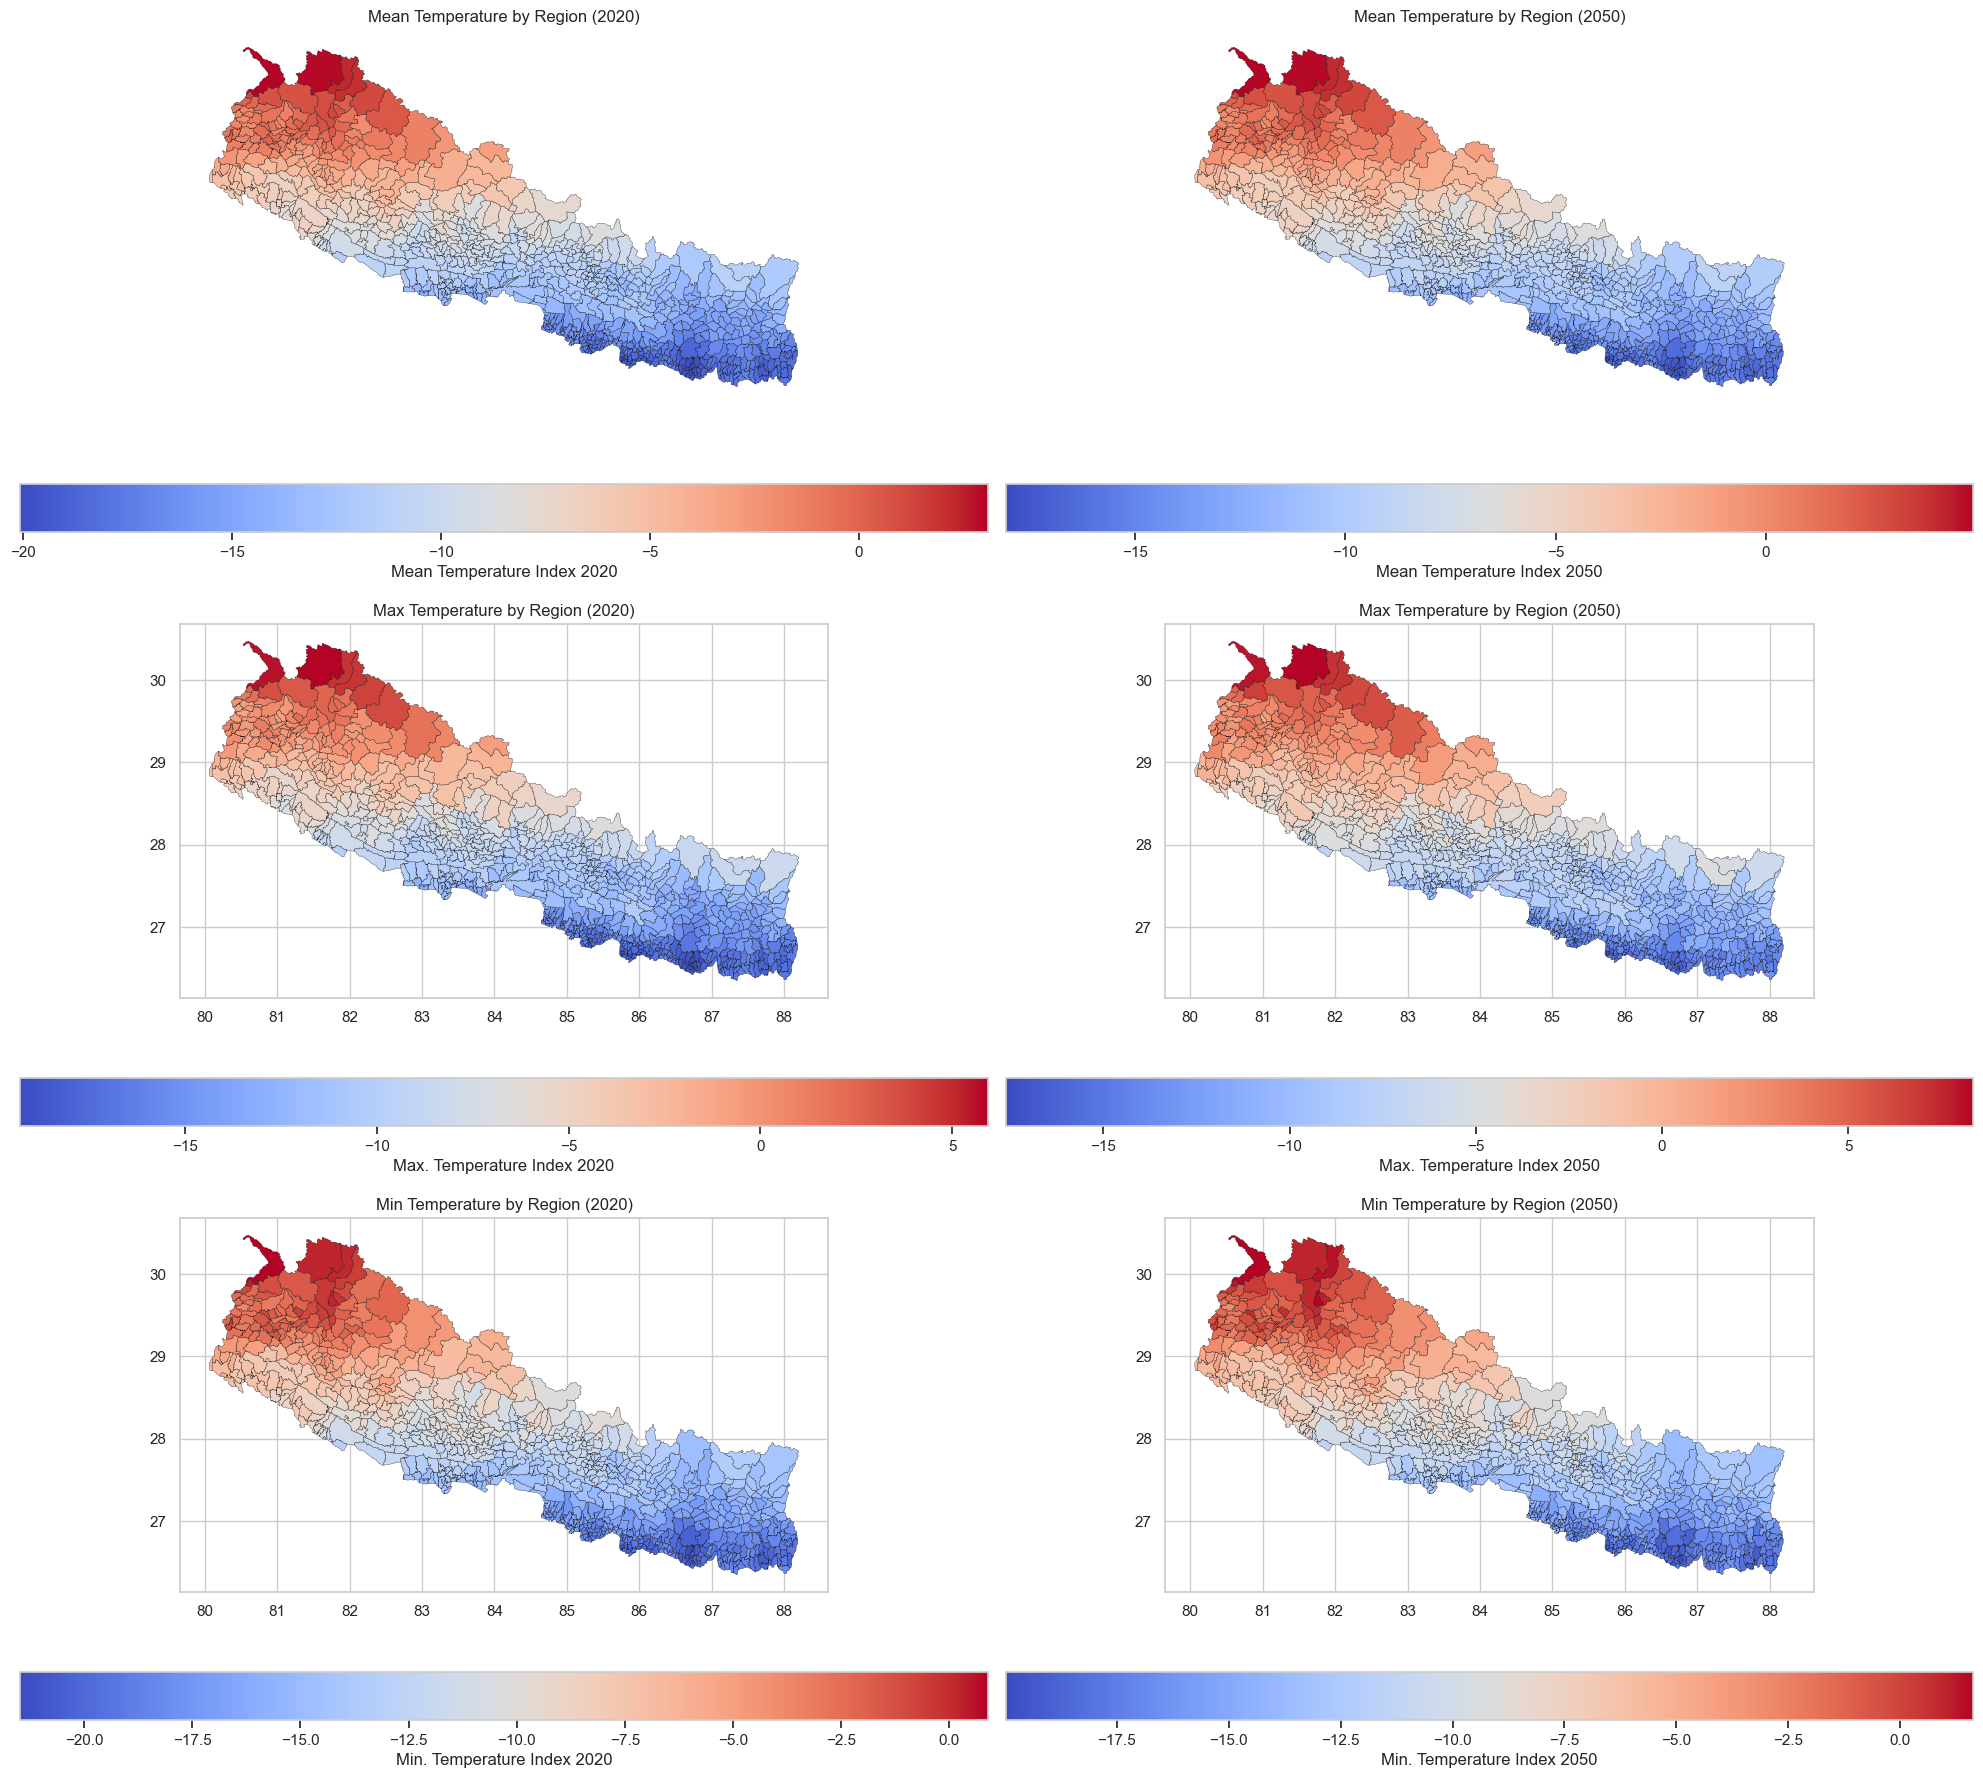

In [308]:
# Visualize regional trends
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
nepal_map.plot(column="mean_temp_2020", ax=ax[0,0], legend=True, cmap="coolwarm", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Mean Temperature Index 2020", 'orientation': "horizontal"})
ax[0,0].set_title("Mean Temperature by Region (2020)")
ax[0,0].set_axis_off()

nepal_map.plot(column="mean_temp_2050", ax=ax[0,1], legend=True, cmap="coolwarm", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Mean Temperature Index 2050", 'orientation': "horizontal"})
ax[0,1].set_title("Mean Temperature by Region (2050)")
ax[0,1].set_axis_off()


nepal_map.plot(column="max_temp_2020", ax=ax[1,0], legend=True, cmap="coolwarm", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Max. Temperature Index 2020", 'orientation': "horizontal"})
ax[1,0].set_title("Max Temperature by Region (2020)")

nepal_map.plot(column="max_temp_2050", ax=ax[1,1], legend=True, cmap="coolwarm", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Max. Temperature Index 2050", 'orientation': "horizontal"})
ax[1,1].set_title("Max Temperature by Region (2050)")

nepal_map.plot(column="min_temp_2020", ax=ax[2,0], legend=True, cmap="coolwarm", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Min. Temperature Index 2020", 'orientation': "horizontal"})
ax[2,0].set_title("Min Temperature by Region (2020)")
nepal_map.plot(column="min_temp_2050", ax=ax[2,1], legend=True, cmap="coolwarm", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Min. Temperature Index 2050", 'orientation': "horizontal"})
ax[2,1].set_title("Min Temperature by Region (2050)")

plt.tight_layout()
plt.show()

# Findings:
>- Mean Temperature: A gradual but consistent increase in mean temperature has been observed nationwide from 2020 to 2050. This indicates a long-term warming trend across Nepal.
>- Maximum Temperature: While there has been a slight increase in maximum temperature over the same period, no significant rise has been recorded. This suggests that extreme daytime temperatures have remained relatively stable from 2020 to 2050.
>- Minimum Temperature: A slight yet statistically significant increase in minimum temperature has been observed across regions from 2020 to 2050. This points to a trend of warmer nights and cooler seasons over time.

# Insights:
>- Long-Term Warming Trend: The increase in mean temperature reflects a gradual warming trend in Nepal, consistent with global climate change patterns observed over the past century.
>- Stable Daytime Extremes: The lack of significant change in maximum temperatures indicates that extreme daytime heat events have not intensified dramatically over the study period.
>- Rising Nighttime Temperatures: The significant increase in minimum temperatures suggests a shift toward warmer nights, which could have cascading effects on ecosystems, human health, and agricultural practices.

# Implications:
>- Ecosystems and Biodiversity: Warmer nights and overall rising temperatures could disrupt ecosystems, particularly in high-altitude regions, leading to shifts in species distribution and biodiversity loss.
>- Agricultural Productivity: The increase in minimum temperatures may affect crop growth cycles, particularly for temperature-sensitive crops. Farmers may need to adopt adaptive practices, such as altering planting schedules or using heat-resistant varieties.
>- Human Health: Warmer nights could exacerbate heat stress, particularly in urban areas, increasing the risk of heat-related illnesses. Public health systems must prepare for these challenges.
>- Water Resources: While maximum temperatures have not risen significantly, the overall warming trend could contribute to glacial retreat in the Himalayas, impacting long-term water availability for rivers and streams.
>- Energy Demand: Rising mean temperatures may lead to increased demand for cooling, placing additional pressure on energy infrastructure and resources.

# Summary:
The temperature data from 2020 to 2050 reveals a gradual increase in mean temperature across Nepal, with a significant rise in minimum temperatures and a slight but stable increase in maximum temperatures. These trends suggest a long-term warming pattern, particularly characterized by warmer nights. The implications of these changes are far-reaching, affecting ecosystems, agriculture, human health, water resources, and energy demand. Addressing these challenges will require proactive climate adaptation strategies, sustainable resource management, and enhanced preparedness to mitigate the impacts of a warming climate. As Nepal moves further into the 21st century (2081 BS/2024 AD), these historical trends provide valuable insights for future planning and policy-making.


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
# Final Summary: Climate Change Impacts in Nepal (2020 to 2050 BS)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
>- The analysis of climate data from 2020 to 2050 BS reveals significant and concerning trends across Nepal, highlighting the country's vulnerability to climate change. These trends encompass temperature changes, precipitation shifts, glacier retreat, river flow reductions, and regional climate vulnerability. Below is a consolidated summary of the findings, insights, implications, and comprehensive conclusions:

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
# Key Findings:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

>- ### Temperature Trends:
>>* Mean Temperature: A gradual but consistent increase in mean temperature has been observed nationwide, indicating a long-term warming trend.
>>* Maximum Temperature: No significant rise in extreme daytime temperatures, suggesting stable heat extremes.
>>* Minimum Temperature: A significant increase in nighttime temperatures, leading to warmer nights and cooler seasons.

>- ### Precipitation Patterns:
>>* Mean Precipitation: A significant decline in mean precipitation in the eastern region, historically the wettest part of Nepal.
>>* Maximum Precipitation: An increase in extreme rainfall events, particularly in the Himalayas and Terai regions.
>>* Minimum Precipitation: A redistribution of rainfall, with historically dry areas experiencing increased precipitation and wetter areas seeing declines.

>- ### Glacier Retreat:
>>* Accelerated glacier retreat from 2020 to 2050, with greater variability in melting rates.
>>* Strong correlation between 2020 and 2050 retreat, indicating that current trends will worsen.
>>* Geographic variability, with some regions experiencing more severe retreat than others.

>- ### River Flow Reduction:
>>* All major rivers, including Karnali, Mahakali, and Koshi, show reduced flow from 2020 to 2050.
>>* Karnali and Mahakali rivers experienced the highest reduction (12.5%), while Koshi maintained the highest flow overall.

>- ### Climate Vulnerability:
>>* Increasing climate vulnerability across all provinces, with Province 2 being the most vulnerable.
>>* Sudurpashchim, while the least vulnerable, still shows a significant rise in vulnerability.
>>* Greater variability in vulnerability indices, indicating uneven impacts across regions.

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
# Insights:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

>- ### Warming Trends and Ecological Shifts:
>>* Rising mean and minimum temperatures are disrupting ecosystems, particularly in high-altitude regions, and affecting biodiversity.
>>* Warmer nights are impacting agricultural cycles and increasing heat stress in urban areas.

>- ### Precipitation Redistribution:
>>* The eastern region, traditionally the wettest, is experiencing a decline in precipitation, while extreme rainfall events are increasing nationwide.
>>* Shifts in minimum precipitation are altering water availability and agricultural practices.

>- ### Glacier and Water Resource Challenges:
>>* Accelerated glacier retreat poses significant threats to freshwater availability, heightens flood risks, and exacerbates climate change by reducing reflectivity.
>>* Reduced river flows are impacting water availability for agriculture, drinking water, and ecosystems.

>- ### Regional Vulnerability:
>>* Province 2 remains the most vulnerable to climate change, necessitating targeted interventions.
>>* Increasing variability in vulnerability indices highlights the need for region-specific adaptation strategies.

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
# Implications:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

>- ### Water Resource Management:
>>* Declining precipitation and glacier retreat will exacerbate water scarcity, particularly in the eastern and downstream regions.
>>* Sustainable water management strategies are critical to ensure water availability for agriculture, hydropower, and domestic use.

>- ### Disaster Preparedness:
>>* Increased extreme rainfall events and glacial lake outbursts raise the risk of flooding and landslides, requiring enhanced disaster preparedness and resilient infrastructure.

>- ### Agricultural Adaptation:
>>* Farmers must adapt to changing precipitation patterns and warmer nights by adopting drought-resistant crops, altering planting schedules, and improving irrigation practices.

>- ### Biodiversity and Ecosystems:
>>* Conservation efforts must address habitat loss and species migration caused by rising temperatures and shifting precipitation patterns.

>- ### Policy and Planning:
>>* Policymakers must prioritize climate adaptation and mitigation efforts, particularly in highly vulnerable regions like Province 2.
>>* Long-term planning is essential to address the uneven impacts of climate change across provinces.

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
# Conclusion:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

> The data from 2020 to 2050 BS paints a concerning picture of Nepal's climate change. Rising temperatures, shifting precipitation patterns, accelerated glacier retreat, and reduced river flows are already impacting ecosystems, water resources, agriculture, and human health. The increasing variability in climate vulnerability across provinces underscores the need for targeted and region-specific adaptation strategies.

> As Nepal moves further into the 21st century (2081 BS), these historical trends provide critical insights for future planning. As we have already expericed the impact of trend of this climate change from 2050 t0 2080. Proactive measures, including sustainable water management, disaster preparedness, agricultural adaptation, and biodiversity conservation, will be essential to mitigate the adverse effects of climate change. Policymakers, researchers, and communities must work together to build resilience and ensure a sustainable future for Nepal in the face of a rapidly changing climate.